In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import deepgraph as dg
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline 

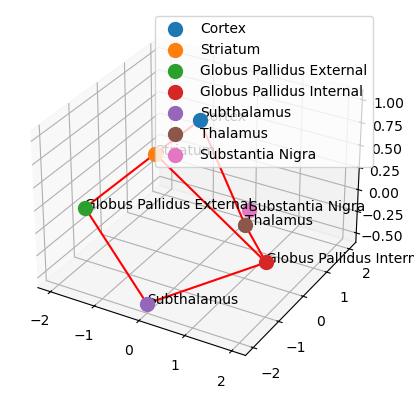

In [1]:
# Define the graph and nodes
G = nx.DiGraph()
nodes = ['Cortex', 'Striatum', 'Globus Pallidus External', 'Globus Pallidus Internal', 
         'Subthalamus', 'Thalamus', 'Substantia Nigra']
G.add_nodes_from(nodes)

# Add edges for direct and indirect pathways
edges = [
    ('Cortex', 'Striatum'),
    ('Striatum', 'Globus Pallidus Internal'),  
    ('Globus Pallidus Internal', 'Thalamus'),
    ('Thalamus', 'Cortex'),

    # Indirect Pathway
    ('Striatum', 'Globus Pallidus External'),
    ('Globus Pallidus External', 'Subthalamus'),
    ('Subthalamus', 'Globus Pallidus Internal')
]

G.add_edges_from(edges)

# 3D Coordinates for the nodes
pos = {
    'Cortex': (0, 0, 1),
    'Striatum': (-1, 0, 0.5),
    'Globus Pallidus External': (-2, -1, 0),
    'Globus Pallidus Internal': (2, -1, 0),
    'Subthalamus': (0, -2, -0.5),
    'Thalamus': (1, 0, 0),
    'Substantia Nigra': (0, 2, -0.5),
}

# Plotting in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Draw nodes
for node, (x, y, z) in pos.items():
    ax.scatter(x, y, z, s=100, label=node)
    ax.text(x, y, z, node, fontsize=10)

# Draw edges
for edge in G.edges():
    x_coords = [pos[edge[0]][0], pos[edge[1]][0]]
    y_coords = [pos[edge[0]][1], pos[edge[1]][1]]
    z_coords = [pos[edge[0]][2], pos[edge[1]][2]]
    ax.plot(x_coords, y_coords, z_coords, 'r')

ax.legend()
plt.show()

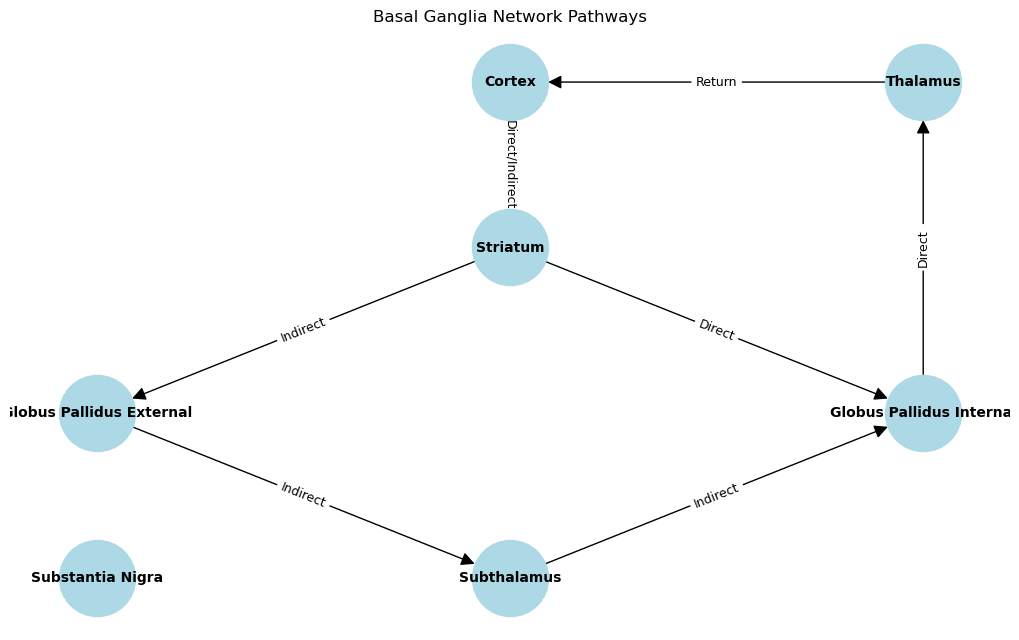

In [2]:
# Create a directed graph
G = nx.DiGraph()

# Define nodes and their layers
nodes = {
    'Cortex': (0, 3),
    'Striatum': (0, 2),
    'Globus Pallidus Internal': (1, 1),
    'Globus Pallidus External': (-1, 1),
    'Subthalamus': (0, 0),
    'Thalamus': (1, 3),
    'Substantia Nigra': (-1, 0)
}

# Add nodes to the graph
G.add_nodes_from(nodes.keys())

# Define edges for the pathways
edges = [
    # Direct Pathway
    ('Cortex', 'Striatum'),
    ('Striatum', 'Globus Pallidus Internal'),
    ('Globus Pallidus Internal', 'Thalamus'),
    ('Thalamus', 'Cortex'),

    # Indirect Pathway
    ('Striatum', 'Globus Pallidus External'),
    ('Globus Pallidus External', 'Subthalamus'),
    ('Subthalamus', 'Globus Pallidus Internal')
]

# Add edges to the graph
G.add_edges_from(edges)

# Draw the graph
plt.figure(figsize=(10, 6))
pos = nodes  # Position layout

nx.draw(
    G, pos,
    with_labels=True,
    node_size=3000,
    node_color='lightblue',
    font_size=10,
    font_weight='bold',
    arrowsize=20,
    edge_color='black'
)

# Draw edge labels to show pathway types
edge_labels = {
    ('Cortex', 'Striatum'): 'Direct/Indirect',
    ('Striatum', 'Globus Pallidus Internal'): 'Direct',
    ('Globus Pallidus Internal', 'Thalamus'): 'Direct',
    ('Thalamus', 'Cortex'): 'Return',

    ('Striatum', 'Globus Pallidus External'): 'Indirect',
    ('Globus Pallidus External', 'Subthalamus'): 'Indirect',
    ('Subthalamus', 'Globus Pallidus Internal'): 'Indirect'
}

nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)

plt.title('Basal Ganglia Network Pathways')
plt.show()


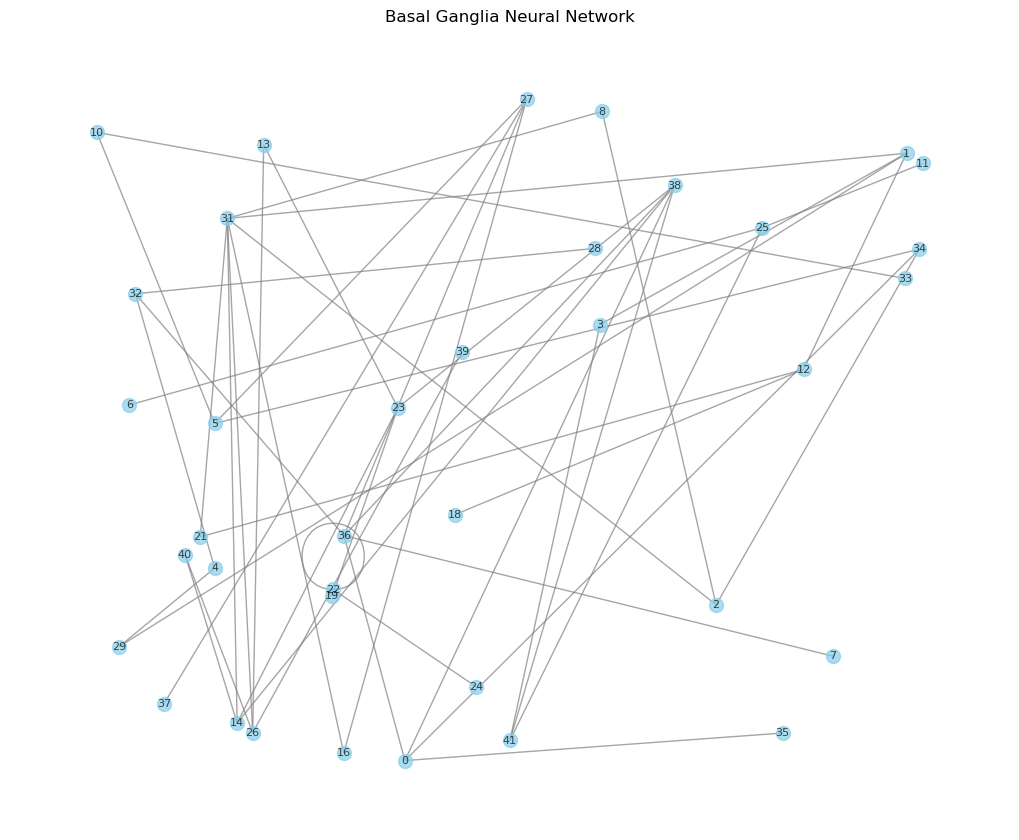

In [10]:
# Create a DataFrame with neurons (nodes)
neurons = pd.DataFrame({
    'structure': ['Cortex']*10 + ['Striatum']*8 + ['GPe']*6 + ['GPi']*6 + ['Subthalamus']*5 + ['Thalamus']*7,
    'neuron_id': list(range(42))
})

# Add x and y positions for plotting purposes
np.random.seed(42)
neurons['x'] = np.random.rand(len(neurons)) * 100
neurons['y'] = np.random.rand(len(neurons)) * 100

# Define connections (edges) between neurons
edges = pd.DataFrame({
    'source': np.random.choice(neurons.index, 50),
    'target': np.random.choice(neurons.index, 50),
})

# Create a DeepGraph instance
graph = dg.DeepGraph(neurons)

# Add edges to the graph
graph.edges = edges

# Visualize the graph using NetworkX
G = nx.from_pandas_edgelist(edges, 'source', 'target')
pos = {i: (neurons.loc[i, 'x'], neurons.loc[i, 'y']) for i in neurons.index}

# Draw the graph
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=100, font_size=8, alpha=0.7, edge_color='gray')
plt.title('Basal Ganglia Neural Network')
plt.show()

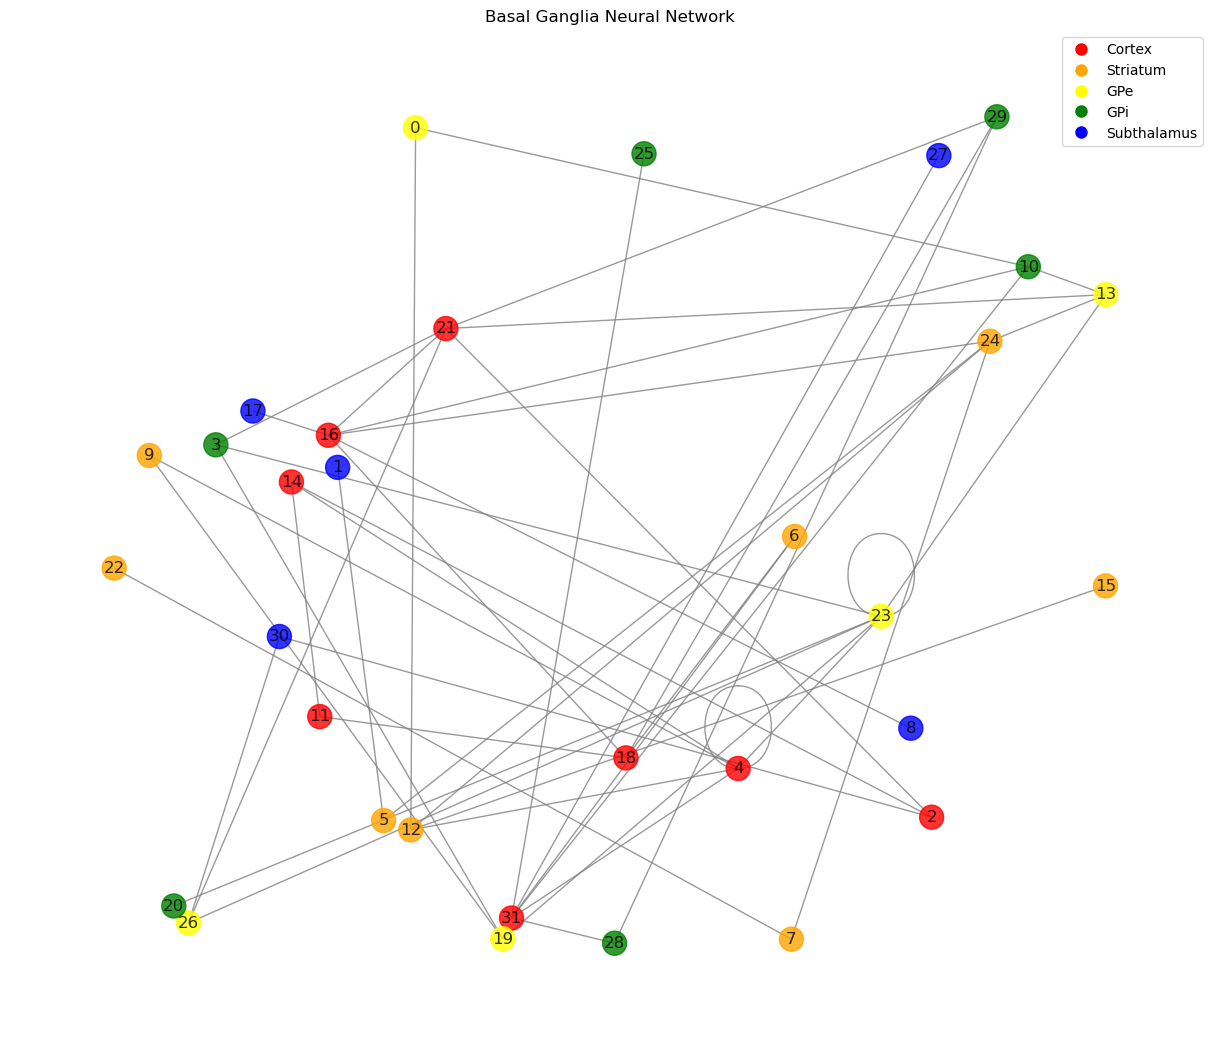

In [16]:
# Create a DataFrame with neurons (nodes)
neurons = pd.DataFrame({
    'structure': ['Cortex']*10 + ['Striatum']*8 + ['GPe']*6 + ['GPi']*6 + ['Subthalamus']*5,
    'neuron_id': list(range(35))
})

# Add x and y positions for plotting purposes
np.random.seed(35)
neurons['x'] = np.random.rand(len(neurons)) * 100
neurons['y'] = np.random.rand(len(neurons)) * 100

# Define connections (edges) between neurons
edges = pd.DataFrame({
    'source': np.random.choice(neurons.index, 50),
    'target': np.random.choice(neurons.index, 50),
})

# Filter neurons that are actually used in edges
used_neurons = list(set(edges['source']).union(set(edges['target'])))
neurons = neurons.loc[neurons.index.isin(used_neurons)].reset_index(drop=True)  # Ensure only used neurons are in dataframe

# Update neuron IDs to match filtered DataFrame
neurons['neuron_id'] = range(len(neurons))

# Create a new mapping from old to new neuron IDs
id_map = {old_id: new_id for new_id, old_id in enumerate(used_neurons)}
edges.replace({'source': id_map, 'target': id_map}, inplace=True)

# Create positions for the filtered neurons
pos = {i: (neurons.loc[i, 'x'], neurons.loc[i, 'y']) for i in neurons.index}

# Map each structure to a color
structure_colors = {
    'Cortex': 'red',
    'Striatum': 'orange',
    'GPe': 'yellow',
    'GPi': 'green',
    'Subthalamus': 'blue'
}
node_colors = [structure_colors[structure] for structure in neurons['structure']]

# Draw the graph with colored nodes
plt.figure(figsize=(12, 10))
G = nx.from_pandas_edgelist(edges, 'source', 'target')
nx.draw(G, pos, with_labels=True, node_color=node_colors, 
        node_size=300, alpha=0.8, edge_color='gray')

# Add legend manually
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label=structure, 
                          markerfacecolor=color, markersize=10)
                   for structure, color in structure_colors.items()]
plt.legend(handles=legend_elements, loc='upper right')
plt.title('Basal Ganglia Neural Network')
plt.show()


In [ ]:
# https://deepgraph.readthedocs.io/en/latest/tutorials/terrorists.html

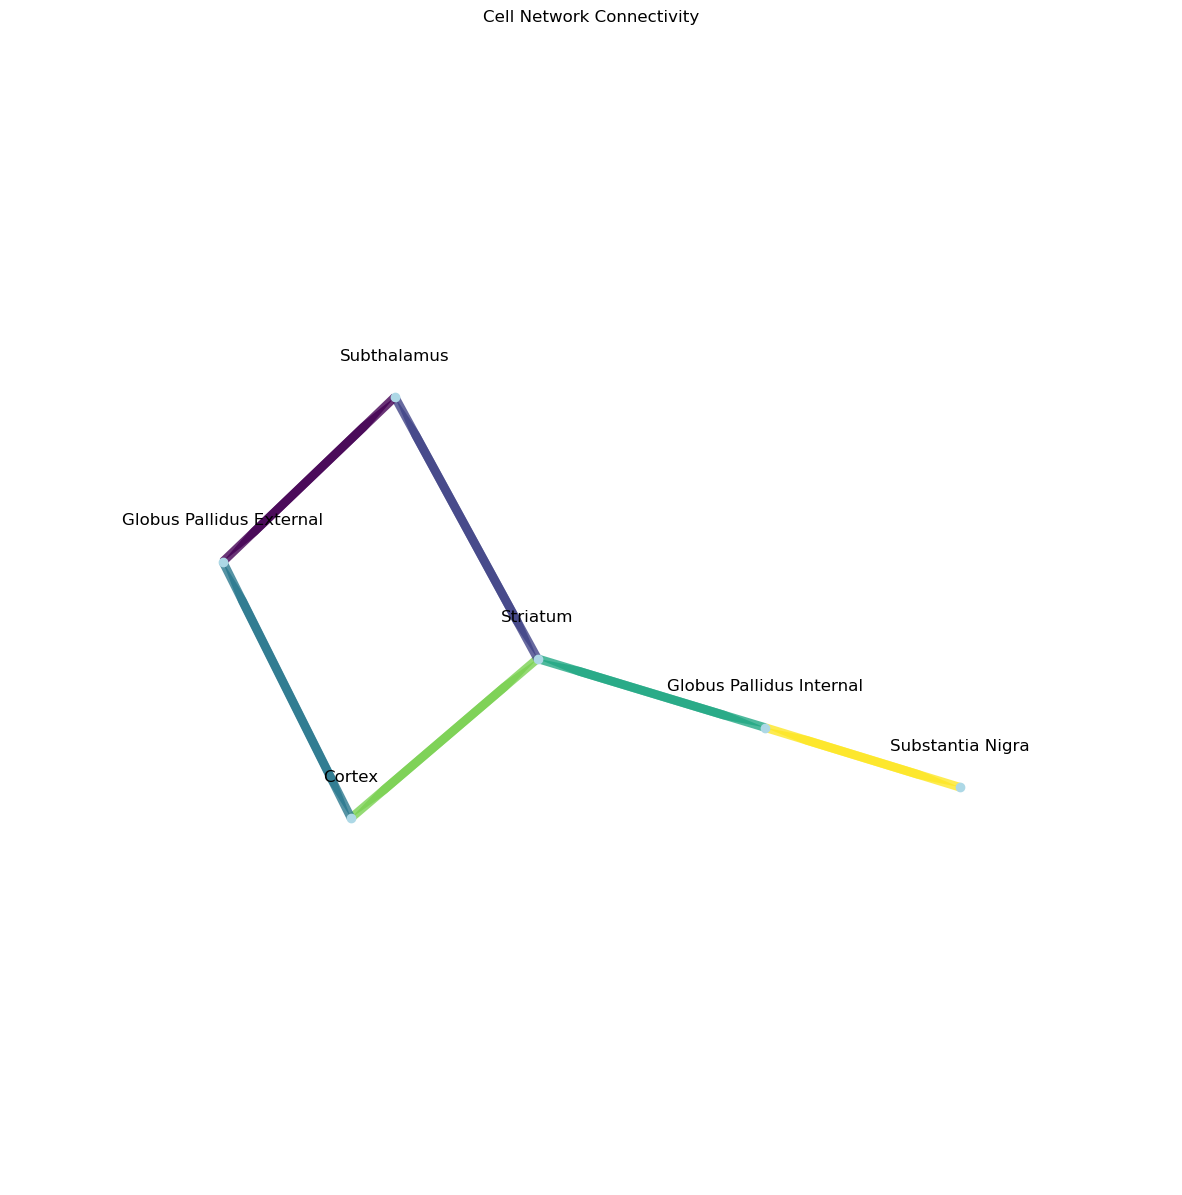

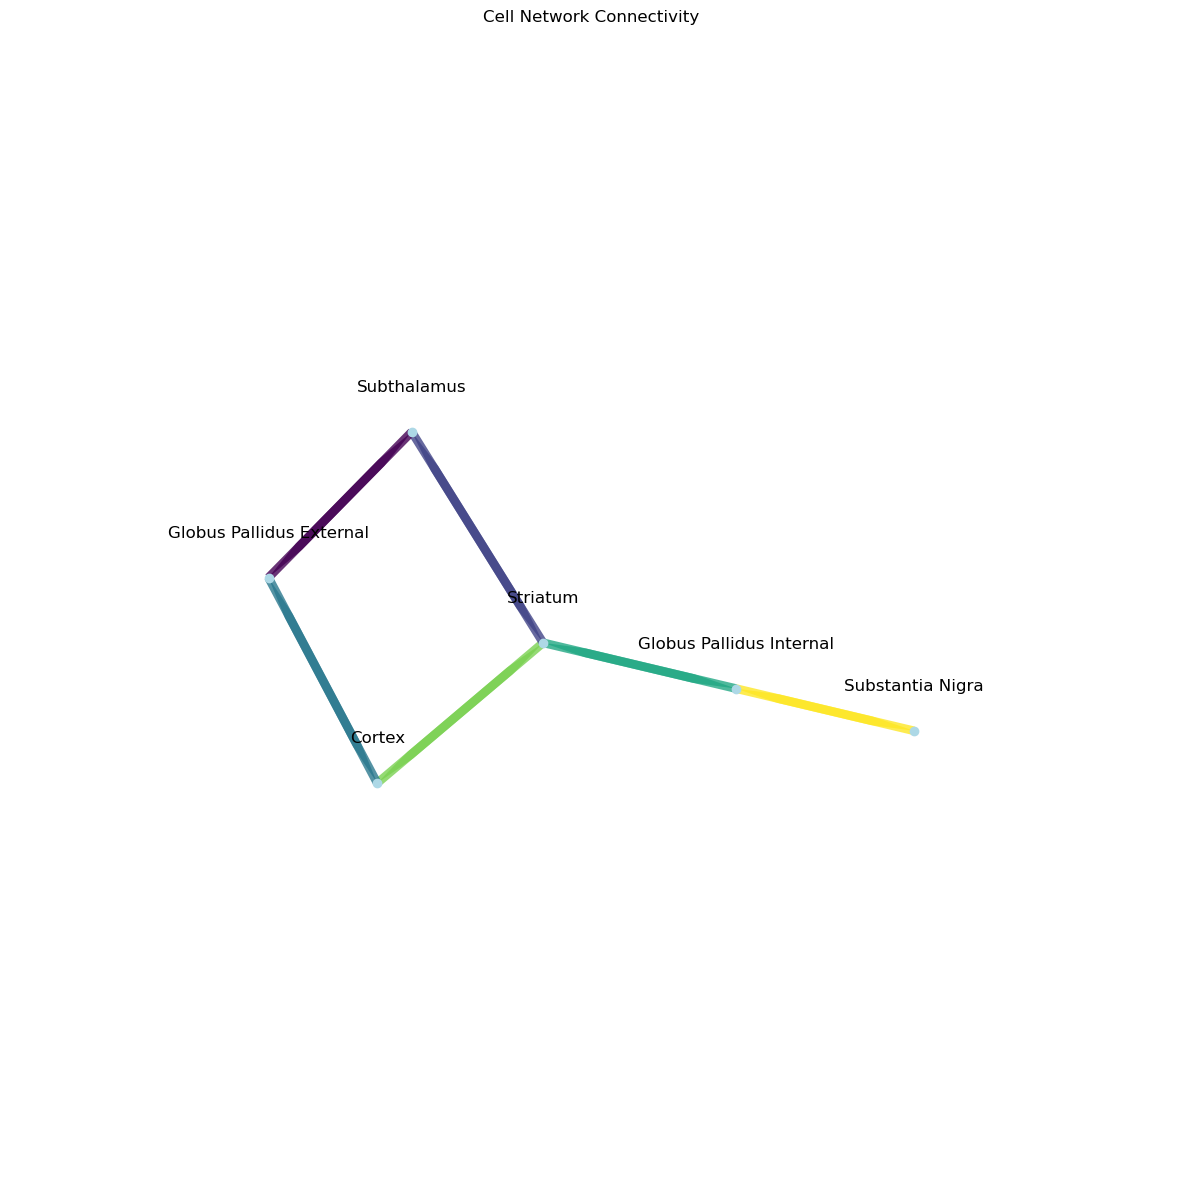

In [4]:
import numpy as np
import pandas as pd
import deepgraph as dg
import matplotlib.pyplot as plt
import graph_tool.draw as gtd
import matplotlib.cm as cm


def visualize_cell_network():
    # 노드 정의
    nodes = ['Cortex', 'Striatum', 'Globus Pallidus External', 
             'Globus Pallidus Internal', 'Subthalamus', 'Substantia Nigra']
    
    # 연결 행렬 정의 (예시로 임의의 연결 관계를 설정)
    connection_matrix = np.array([
        [0, 1, 1, 0, 0, 0],  # Cortex
        [1, 0, 0, 1, 1, 0],  # Striatum
        [1, 0, 0, 0, 1, 0],  # Globus Pallidus External
        [0, 1, 0, 0, 0, 1],  # Globus Pallidus Internal
        [0, 1, 1, 0, 0, 0],  # Subthalamus
        [0, 0, 0, 1, 0, 0]   # Substantia Nigra
    ])
    
    # 연결 확률 행렬 정의 (예시로 임의의 확률을 설정)
    prob_matrix = np.array([
        [0, 0.8, 0.6, 0, 0, 0],  # Cortex
        [0.8, 0, 0, 0.7, 0.5, 0],  # Striatum
        [0.6, 0, 0, 0, 0.4, 0],  # Globus Pallidus External
        [0, 0.7, 0, 0, 0, 0.9],  # Globus Pallidus Internal
        [0, 0.5, 0.4, 0, 0, 0],  # Subthalamus
        [0, 0, 0, 0.9, 0, 0]   # Substantia Nigra
    ])
    
    # 노드 테이블 생성
    v = pd.DataFrame({'Neuron': nodes})
    
    # 엣지 테이블 생성
    edges = []
    for i in range(len(nodes)):
        for j in range(len(nodes)):
            if connection_matrix[i, j] == 1:
                edges.append((i, j, prob_matrix[i, j]))
    
    e = pd.DataFrame(edges, columns=['source', 'target', 'weight'])
    
    # Filter neurons that are actually used in edges
    used_neurons = list(set(e['source']).union(set(e['target'])))
    v = v.loc[v.index.isin(used_neurons)].reset_index(drop=True)

    # Update neuron IDs to match filtered DataFrame
    v['neuron_id'] = range(len(v))
    
    # Create a new mapping from old to new neuron IDs
    id_map = {old_id: new_id for new_id, old_id in enumerate(used_neurons)}
    e.replace({'source': id_map, 'target': id_map}, inplace=True)

    # Change the edges DataFrame to have multi-level index
    e.set_index(['source', 'target'], inplace=True)

    # DeepGraph 객체 생성
    g = dg.DeepGraph(v, e)
    
    # 그래프 도구 객체 생성
    g_tmp = g.return_gt_graph(features='Neuron')
    g_tmp.set_directed(False)

    # sfdp 레이아웃 위치 가져오기
    pos = gtd.sfdp_layout(g_tmp, mu=.3, gamma=.01)
    pos = pos.get_2d_array([0, 1])
    g.v['x'] = pos[0]
    g.v['y'] = pos[1]

    # 엣지 색상 설정 (숫자 값으로 변환)
    edge_colors = g.e['weight'].values  # 엣지 가중치를 숫자 값으로 사용
    norm = plt.Normalize(vmin=min(edge_colors), vmax=max(edge_colors))  # 정규화
    edge_colors = cm.viridis(norm(edge_colors))  # 색상 맵 적용
    edge_colors = edge_colors[:len(g.e)]

    # 그래프 시각화
    fig, ax = plt.subplots(figsize=(15, 15))
    g.plot_2d('x', 'y', edges=True,
              kwds_scatter={'c': 'lightblue'},
              kwds_quiver={'headwidth': 1, 'alpha': .8, 'color': edge_colors},  # 색상 적용
              ax=ax)
    # 축 숨기기 및 노드 이름 표시
    ax.axis('off')
    ax.set_xlim((g.v.x.min() - 1, g.v.x.max() + 1))
    ax.set_ylim((g.v.y.min() - 1, g.v.y.max() + 1))
    for i, node in enumerate(nodes):
        plt.text(g.v['x'][i], g.v['y'][i] + 0.1, node, fontsize=12, ha='center')

    plt.title('Cell Network Connectivity')
    plt.show()

# 함수 호출
visualize_cell_network()

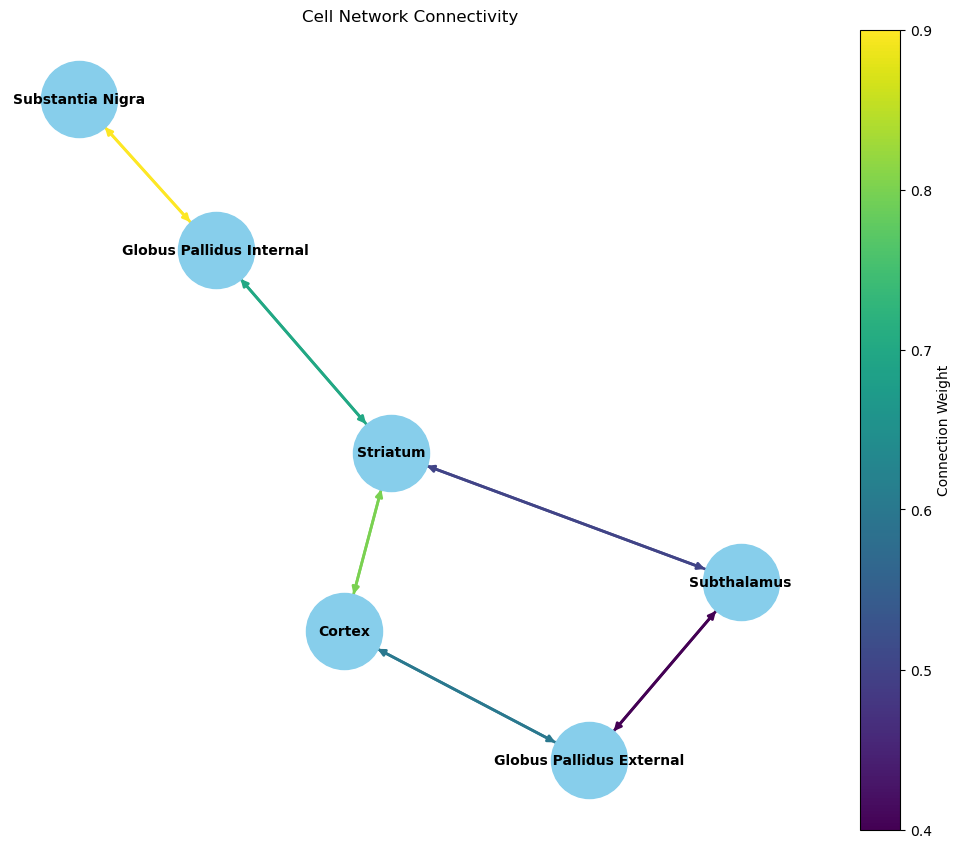

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.cm as cm
import matplotlib.colorbar as colorbar

def visualize_cell_network():
    # 노드 정의
    nodes = ['Cortex', 'Striatum', 'Globus Pallidus External', 
             'Globus Pallidus Internal', 'Subthalamus', 'Substantia Nigra']
    
    # 연결 행렬 정의
    connection_matrix = np.array([
        [0, 1, 1, 0, 0, 0],  # Cortex
        [1, 0, 0, 1, 1, 0],  # Striatum
        [1, 0, 0, 0, 1, 0],  # GPe
        [0, 1, 0, 0, 0, 1],  # GPi
        [0, 1, 1, 0, 0, 0],  # Subthalamus
        [0, 0, 0, 1, 0, 0]   # SN
    ])
    
    # 연결 확률 행렬 정의
    prob_matrix = np.array([
        [0, 0.8, 0.6, 0, 0, 0],  # Cortex
        [0.8, 0, 0, 0.7, 0.5, 0],  # Striatum
        [0.6, 0, 0, 0, 0.4, 0],  # GPe
        [0, 0.7, 0, 0, 0, 0.9],  # GPi
        [0, 0.5, 0.4, 0, 0, 0],  # Subthalamus
        [0, 0, 0, 0.9, 0, 0]   # SN
    ])
    
    # 엣지 리스트 생성
    edges = []
    weights = []
    for i in range(len(nodes)):
        for j in range(len(nodes)):
            if connection_matrix[i, j] == 1:
                edges.append((nodes[i], nodes[j]))
                weights.append(prob_matrix[i, j])

    # NetworkX 그래프 객체 생성
    G = nx.DiGraph()  # 방향성 그래프
    for i, node in enumerate(nodes):
        G.add_node(node, pos=(np.random.rand(), np.random.rand()))  # 랜덤 위치 할당

    # 엣지 추가 (가중치 적용)
    for (src, dst), weight in zip(edges, weights):
        G.add_edge(src, dst, weight=weight)

    # 노드 위치 설정
    pos = nx.spring_layout(G, seed=42)

    # 엣지 색상 설정 (가중치 기반)
    norm = plt.Normalize(vmin=min(weights), vmax=max(weights))
    edge_colors = [cm.viridis(norm(w)) for w in weights]

    # 그래프 시각화
    plt.figure(figsize=(10, 8))
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=3000, font_size=10, 
            font_weight='bold', edge_color=edge_colors, width=2.0)
    plt.title('Cell Network Connectivity')

    # 컬러바 추가
    sm = plt.cm.ScalarMappable(cmap=cm.viridis, norm=norm)  # 컬러 매핑 객체 생성
    sm.set_array([])  # 빈 배열 설정 (필수)
    cbar = plt.colorbar(sm, ax=plt.gca(), label='Connection Weight')  # 현재 Axes에 컬러바 추가
    plt.show()

# 함수 호출
visualize_cell_network()

/opt/anaconda3/envs/brain/lib/python3.9/site-packages/graph_tool/draw/cairo_draw.py:681: UserWarning: Unknown parameter: ax
  warnings.warn("Unknown parameter: " + k, UserWarning)


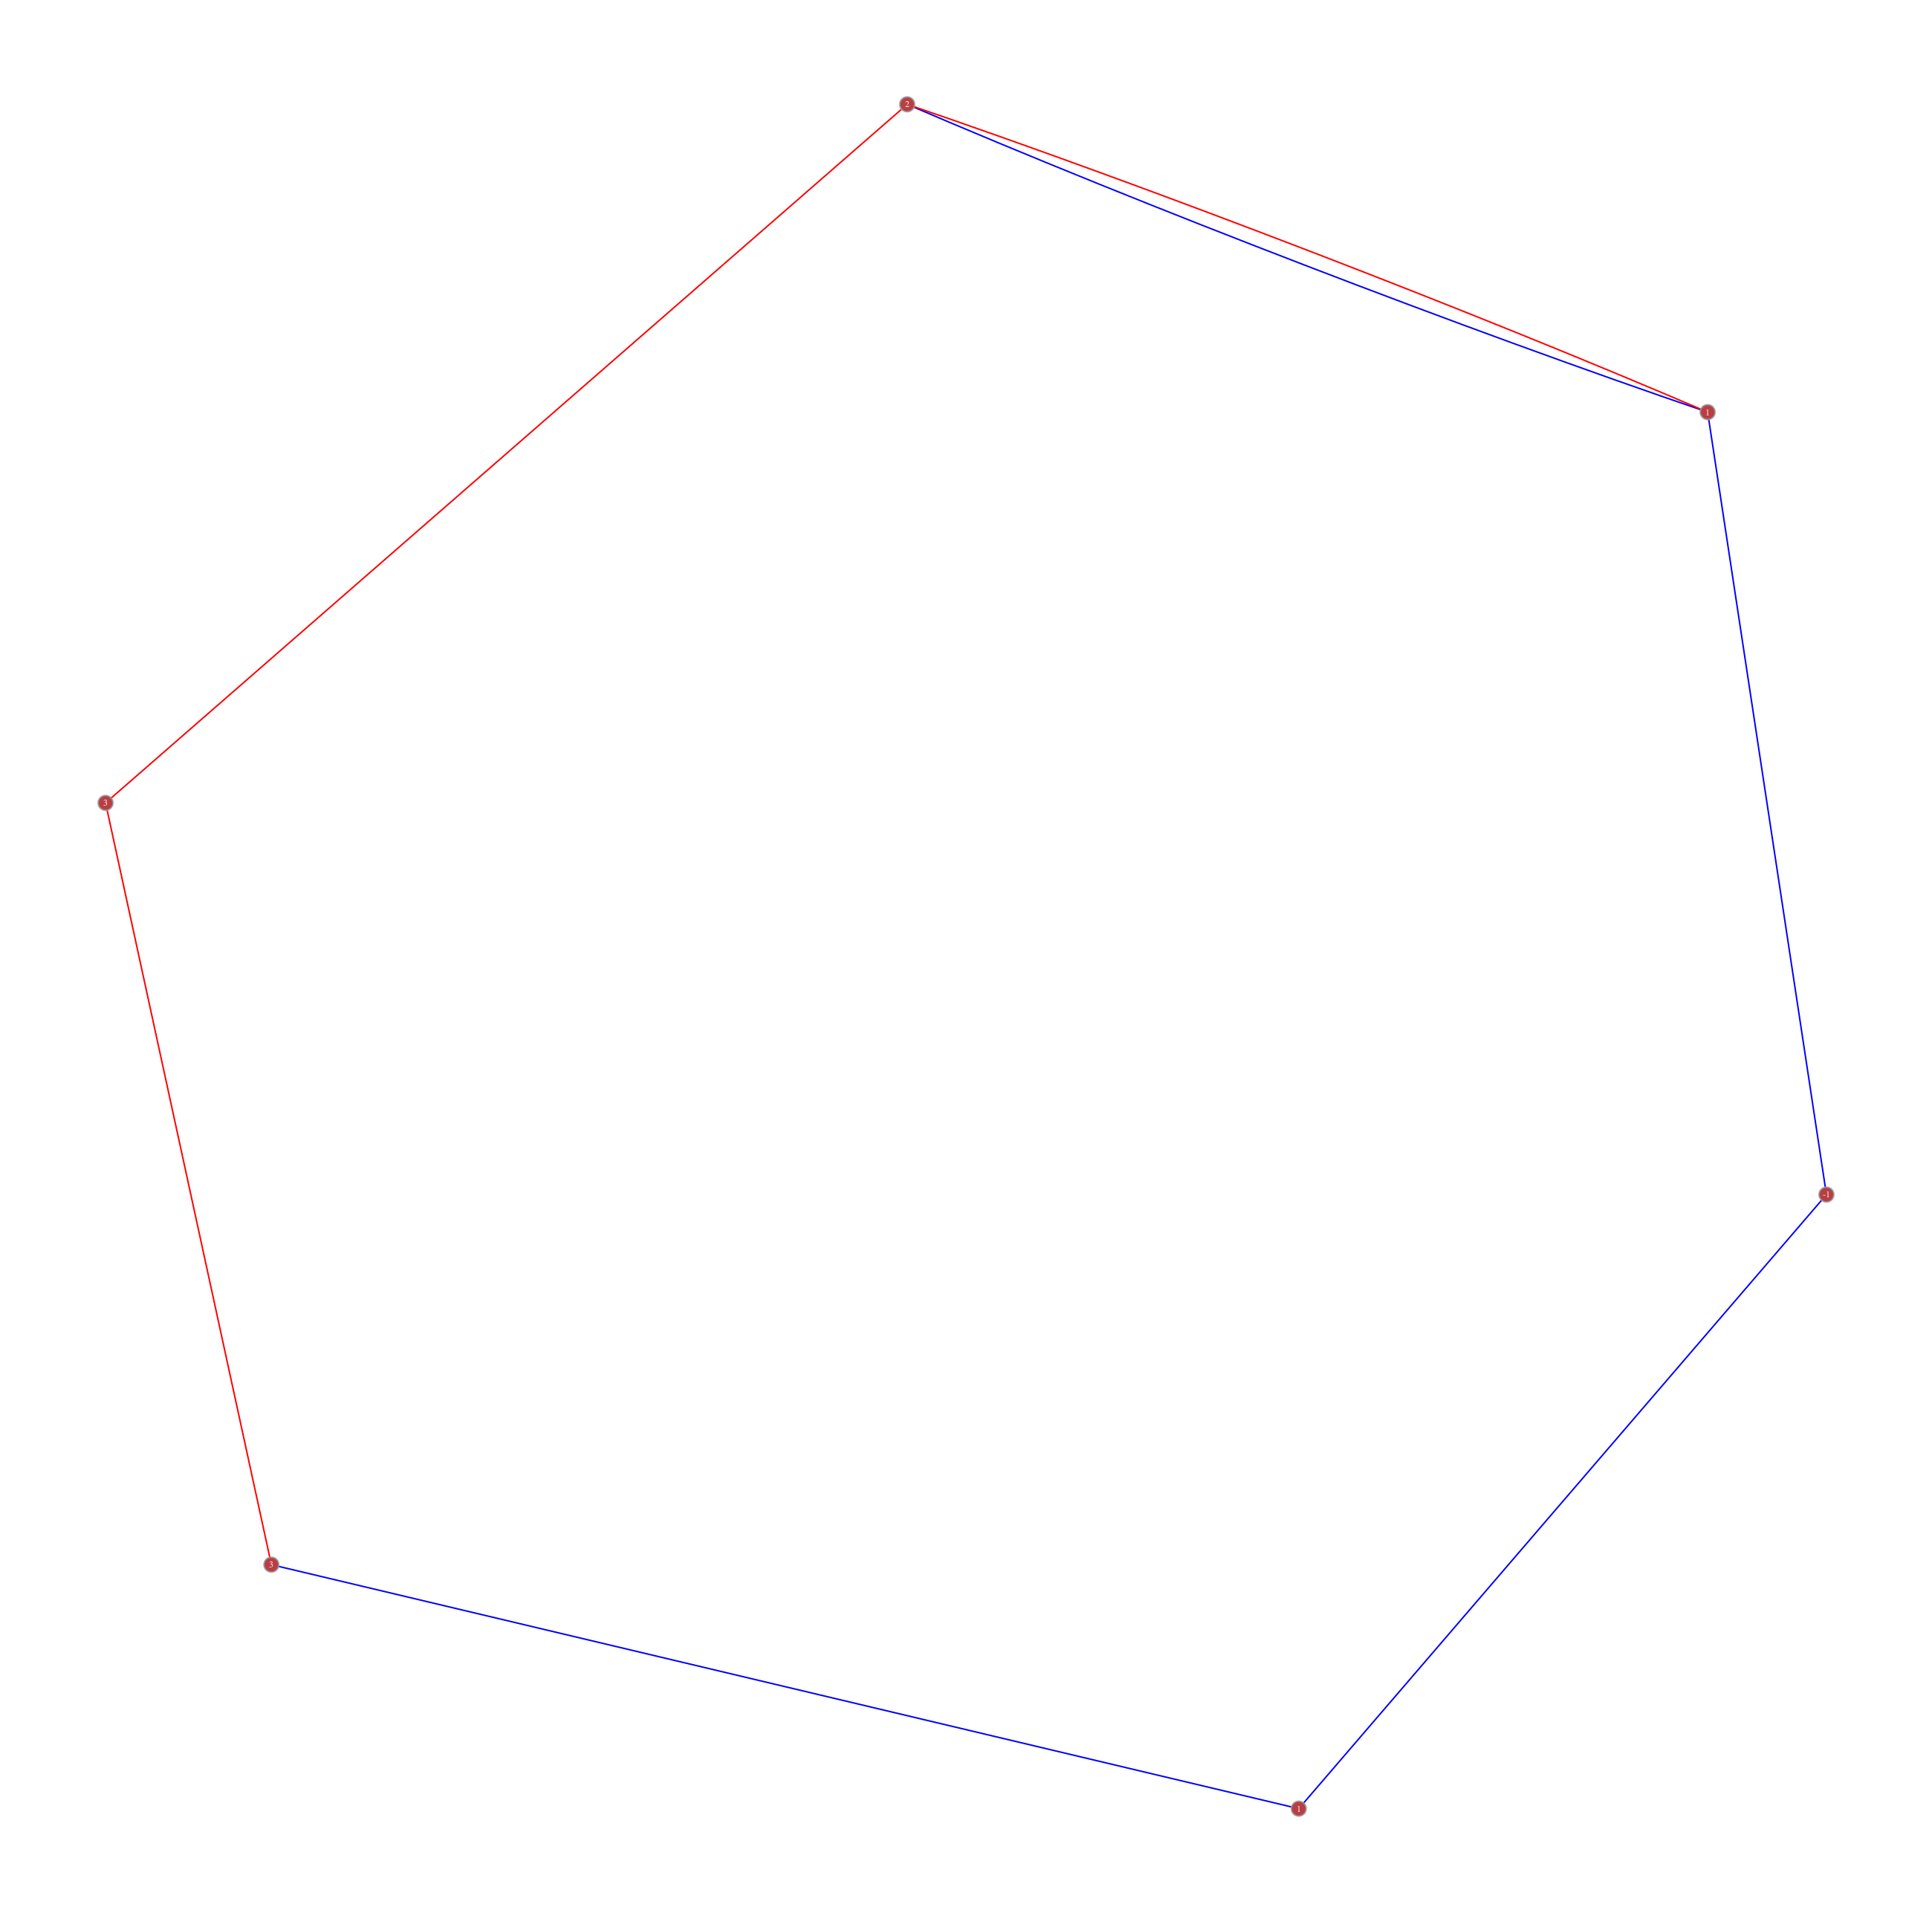

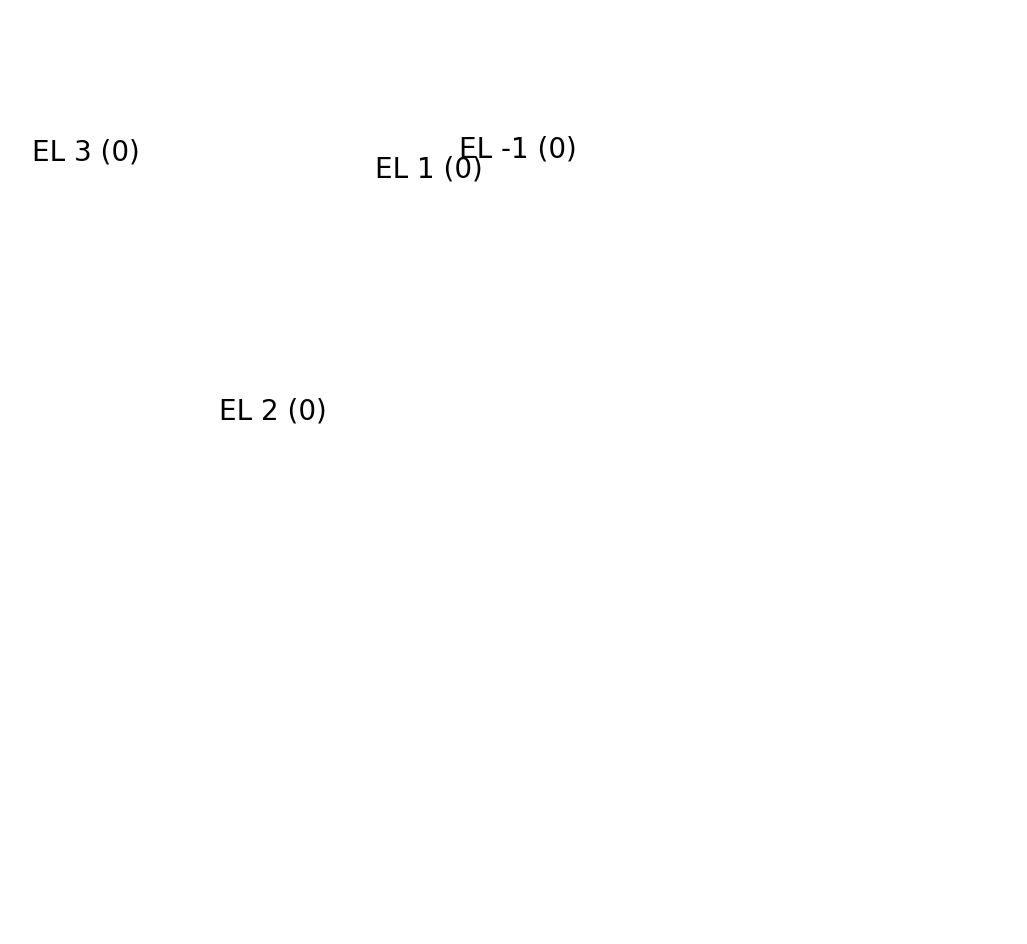

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from graph_tool.all import *
import pandas as pd

# 예시 데이터 (실제 데이터에 맞게 수정)
data = {'source': ['STN', 'GPe', 'Cortex', 'Cortex', 'MSN_D1', 'MSN_D2', 'STN'],
        'target': ['GPe', 'STN', 'MSN_D1', 'MSN_D2', 'SNr', 'GPe', 'SNr'],
        'type': ['Excitatory', 'Inhibitory', 'Excitatory', 'Inhibitory', 'Excitatory', 'Inhibitory', 'Excitatory'],
        'Education Level': [1, 2, 3, 2, 1, 3, 2]}  # 임의의 'Education Level' 특성

neuron_counts = {
    'STN': 10,
    'GPe': 5,
    'Cortex': 8,
    'MSN_D1': 30,
    'MSN_D2': 20,
    'SNr': 15
}

# 데이터프레임 생성
df = pd.DataFrame(data)

# GraphTool 그래프 생성
g = Graph(directed=False)  # 무방향 그래프 생성

# 노드 추가
node_map = {}  # 각 뉴런에 대한 고유 ID 매핑
for neuron in pd.concat([df['source'], df['target']]).unique():
    v = g.add_vertex()
    node_map[neuron] = v

# 엣지 추가
for _, row in df.iterrows():
    src = node_map[row['source']]
    tgt = node_map[row['target']]
    g.add_edge(src, tgt)

# Education Level 속성 추가
education_level = g.new_vertex_property("int")

# 각 vertex의 인덱스를 기반으로 Education Level 설정
for v in g.vertices():
    # 각 vertex의 인덱스를 사용하여 해당하는 이름을 찾음
    neuron_name = list(node_map.keys())[int(v)]  # Vertex의 인덱스를 사용하여 이름 찾기
    # 해당 neuron_name에 맞는 Education Level을 설정
    if not df[df['source'] == neuron_name].empty:  # 추가된 조건문
        education_level[v] = df[df['source'] == neuron_name]['Education Level'].iloc[0]
    else:
        education_level[v] = -1  # 기본값 설정 (예: -1)

g.vp['Education Level'] = education_level

reverse_node_map = {v: k for k, v in node_map.items()}
C = [df.loc[(df['source'] == reverse_node_map[src]) & (df['target'] == reverse_node_map[tgt]), 'type'].iloc[0] for src, tgt in g.edges()]

# 레이아웃 설정 (sfdp_layout 사용)
pos = sfdp_layout(g, groups=g.vp['Education Level'], mu=.3, gamma=.1)
pos_array = pos.get_2d_array([0, 1])

# PropertyMap으로 변환
pos_map = g.new_vertex_property("vector<double>")  # 위치를 위한 PropertyMap 생성
for v in g.vertices():
    pos_map[v] = [pos_array[0][int(v)], pos_array[1][int(v)]]  # x, y 좌표 설정

g.vp['x'] = g.new_vertex_property("double")  # x 좌표를 위한 PropertyMap 생성
g.vp['y'] = g.new_vertex_property("double")  # y 좌표를 위한 PropertyMap 생성

for v in g.vertices():
    g.vp['x'][v] = pos_array[0][int(v)]  # x 좌표 설정
    g.vp['y'][v] = pos_array[1][int(v)]  # y 좌표 설정

color_map = {'Excitatory': 'blue', 'Inhibitory': 'red'}  # 색상 매핑 정의
edge_color_map = g.new_edge_property("string")  # 엣지 색상을 위한 PropertyMap 생성
for i, edge in enumerate(g.edges()):
    edge_color_map[edge] = color_map[C[i]]  # 각 엣지에 색상 설정

# Education Level을 위한 PropertyMap 생성
education_level_map = g.new_vertex_property("string")  # 문자열 PropertyMap 생성
for v in g.vertices():
    education_level_map[v] = str(g.vp['Education Level'][v])  # Education Level을 문자열로 변환하여 설정

# 그래프 시각화
fig, ax = plt.subplots(figsize=(13, 12))

# graph_draw를 사용하여 그래프 시각화
graph_draw(g, pos_map, vertex_text=education_level_map, vertex_size=10, edge_color=edge_color_map, output_size=(1300, 1200), ax=ax)

# 그래프 설정
ax.axis('off')

# x, y 좌표를 NumPy 배열로 변환하여 최소값과 최대값 계산
x_values = np.array([g.vp['x'][v] for v in g.vertices()])
y_values = np.array([g.vp['y'][v] for v in g.vertices()])

ax.set_xlim((x_values.min() - 1, x_values.max() + 1))
ax.set_ylim((y_values.min() - 1, y_values.max() + 1))

# Education Level 텍스트 추가
education_levels = np.unique([g.vp['Education Level'][v] for v in g.vertices()])  # unique()를 numpy로 대체
for el in education_levels:
    vertices_of_level = [v for v in g.vertices() if g.vp['Education Level'][v] == el]
    avg_x = np.mean([g.vp['x'][v] for v in vertices_of_level])
    avg_y = np.mean([g.vp['y'][v] for v in vertices_of_level])
    
    # 사용자 지정 뉴런 개수 가져오기
    neuron_count = neuron_counts.get(el, 0)  # 기본값 0 설정
    neuron_name = f'EL {el} ({neuron_count})'  # 뉴런 개수 포함
    ax.text(avg_x - 1, avg_y + 1, neuron_name, fontsize=20)

plt.show()


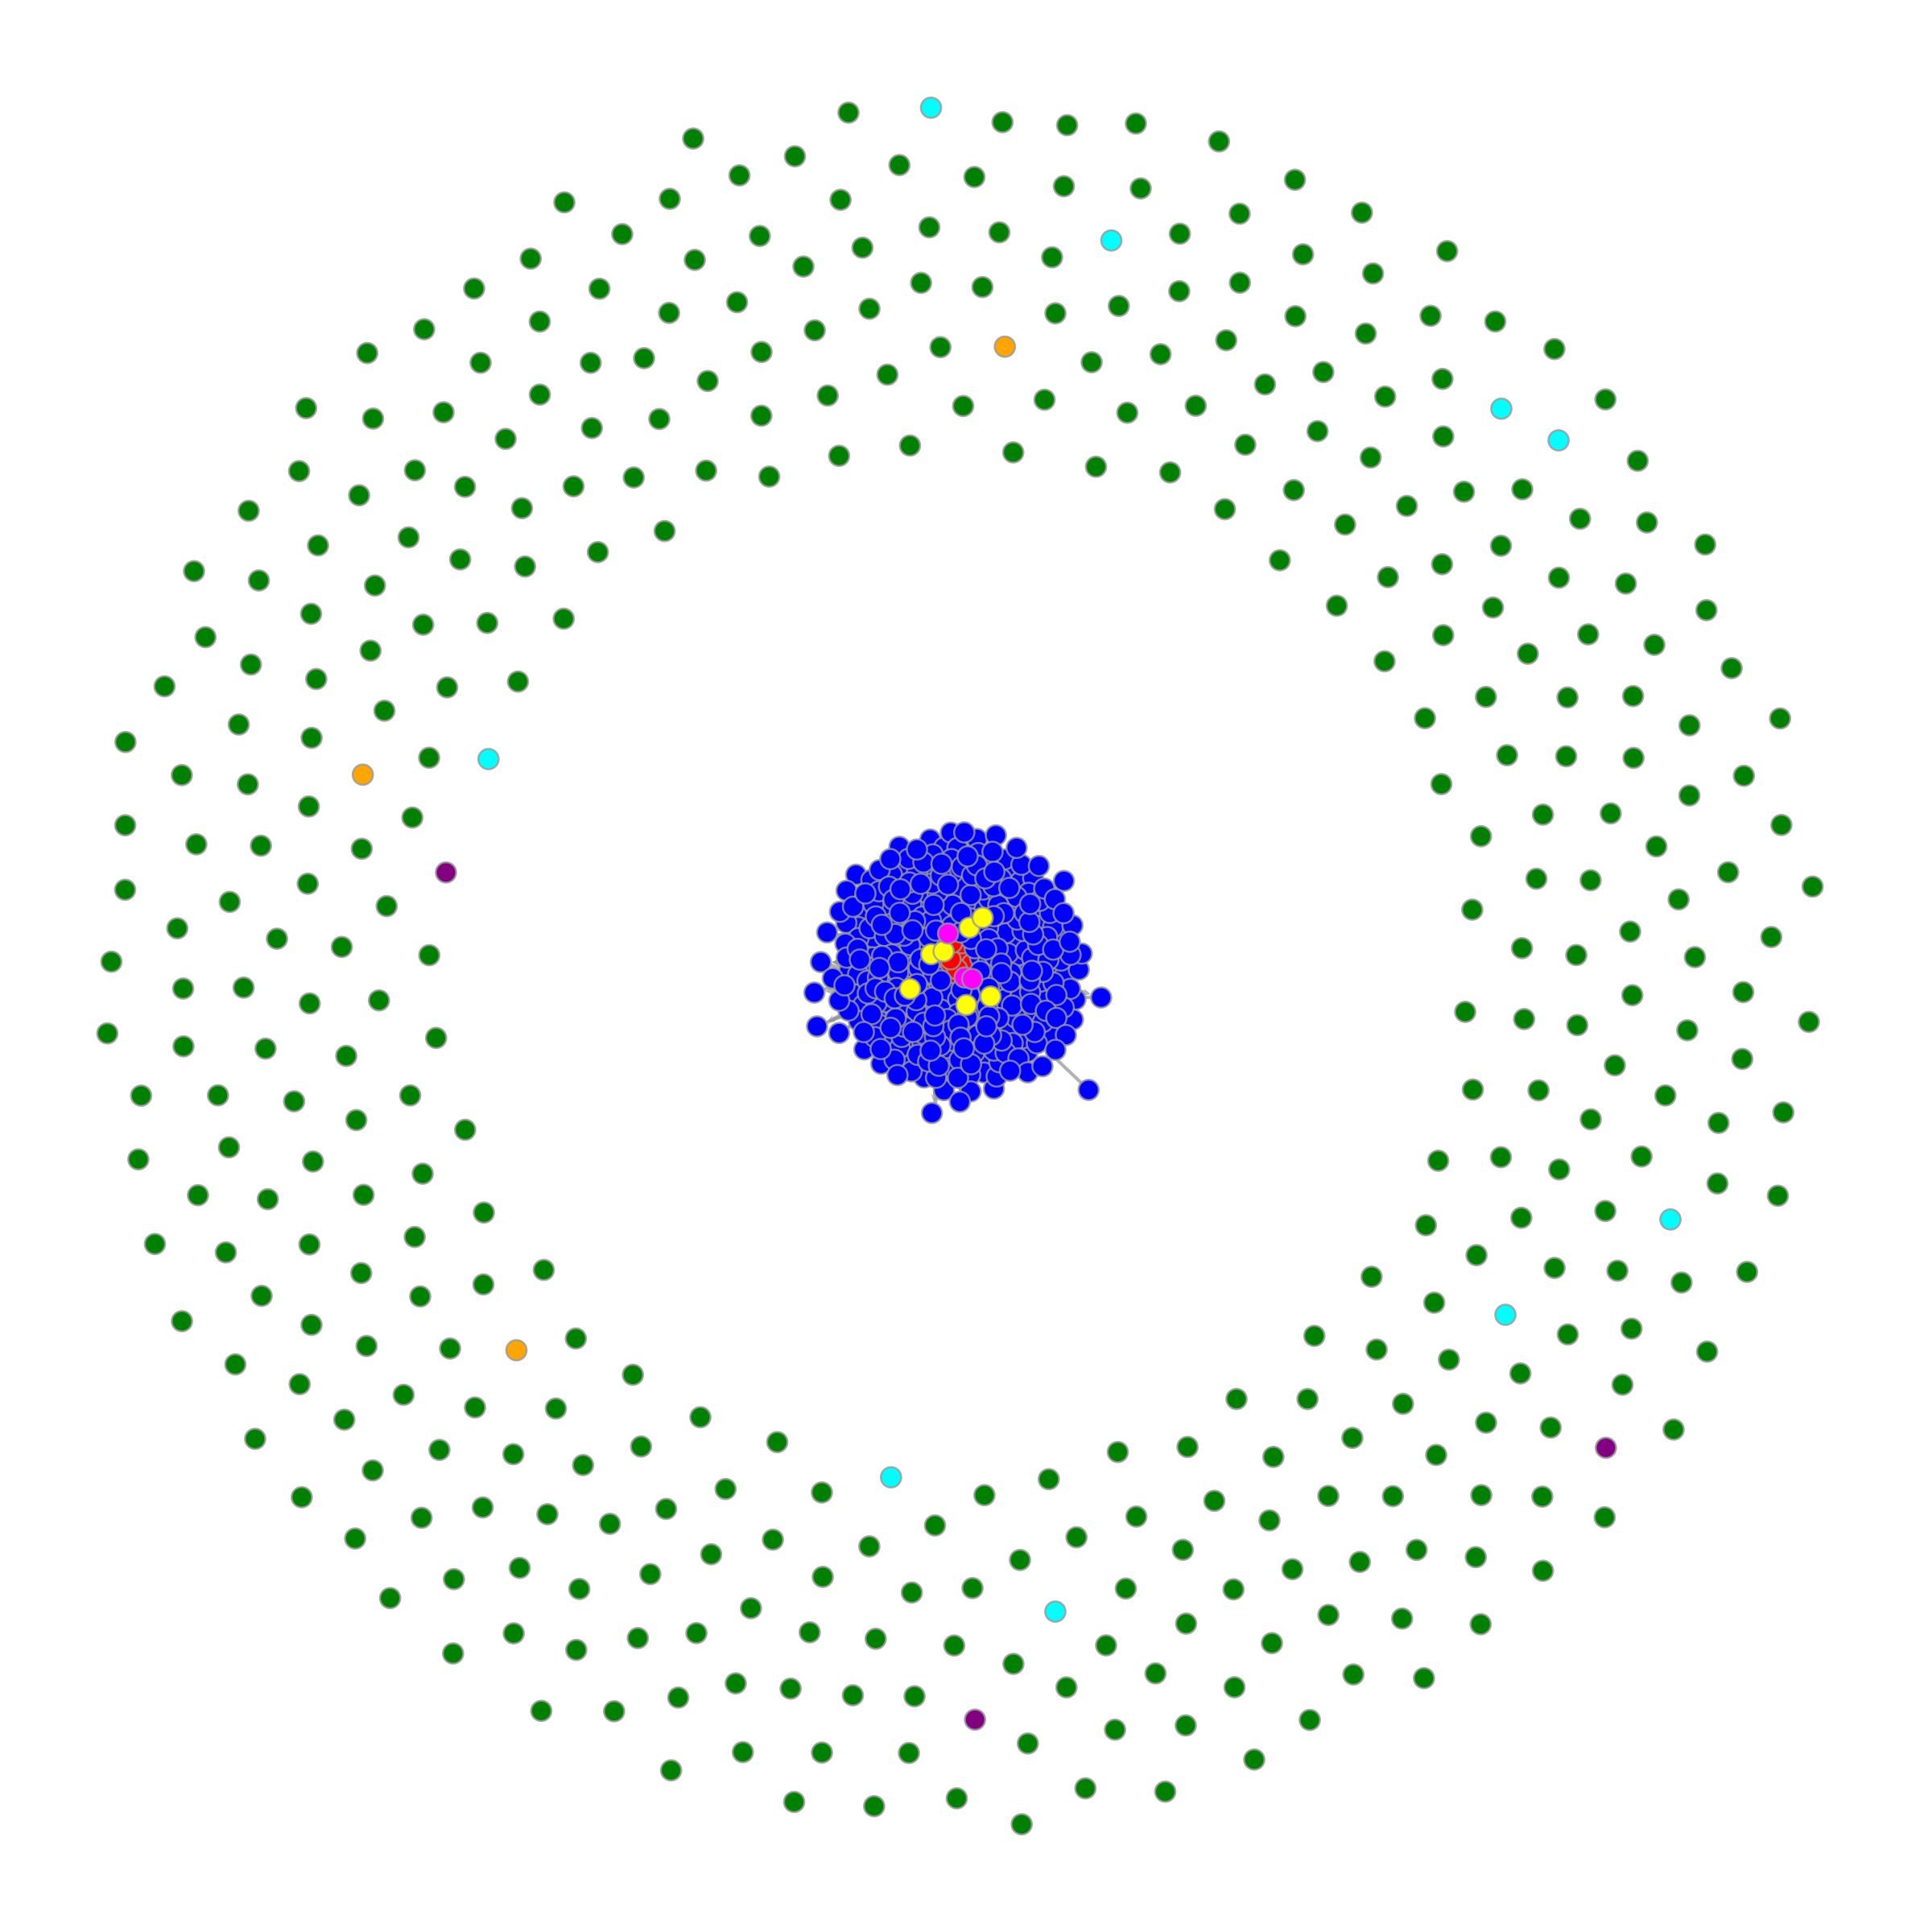

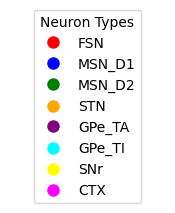

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from graph_tool.all import *

# 그래프 설정
g = Graph(directed=True)
neuron_vertices = {}
vprop_color = g.new_vertex_property("vector<double>")
eprop_width = g.new_edge_property("double")
eprop_color = g.new_edge_property("vector<double>")

# 뉴런 노드 추가 및 색상 할당
for neuron, count in neuron_counts.items():
    neuron_vertices[neuron] = [g.add_vertex() for _ in range(int(count / 100))]
    for v in neuron_vertices[neuron]:
        vprop_color[v] = mcolors.to_rgba(color_map[neuron])

# 연결 추가 및 에지 속성 설정
for (src, tgt), prob in connection_probs.items():
    src_vertices = neuron_vertices[src]
    tgt_vertices = neuron_vertices[tgt]
    for src_vertex in src_vertices:
        connected_tgt_vertices = np.random.choice(tgt_vertices, int(len(tgt_vertices) * prob), replace=False)
        for tgt_vertex in connected_tgt_vertices:
            edge = g.add_edge(src_vertex, tgt_vertex)
            # 에지 굵기 및 색상 설정
            eprop_width[edge] = 1.5 + prob * 3
            eprop_color[edge] = mcolors.to_rgba('gray', alpha=0.6)

# 레이아웃 설정 및 그래프 그리기
pos = sfdp_layout(g)

# `graph_draw`를 호출할 때 별도의 figure 설정 제거
graph_draw(g, pos, vertex_fill_color=vprop_color, edge_pen_width=eprop_width, 
           edge_color=eprop_color, output_size=(1300, 1200), 
           edge_marker_size=5)  # 화살표 크기 설정

# 범례를 별도의 `matplotlib` 그래프에 추가
fig, ax = plt.subplots(figsize=(2, 2))
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[neuron], 
                             markersize=10, label=neuron) for neuron in neuron_counts.keys()]
ax.legend(handles=legend_handles, loc='center', fontsize='medium', title="Neuron Types")
ax.axis('off')
plt.show()


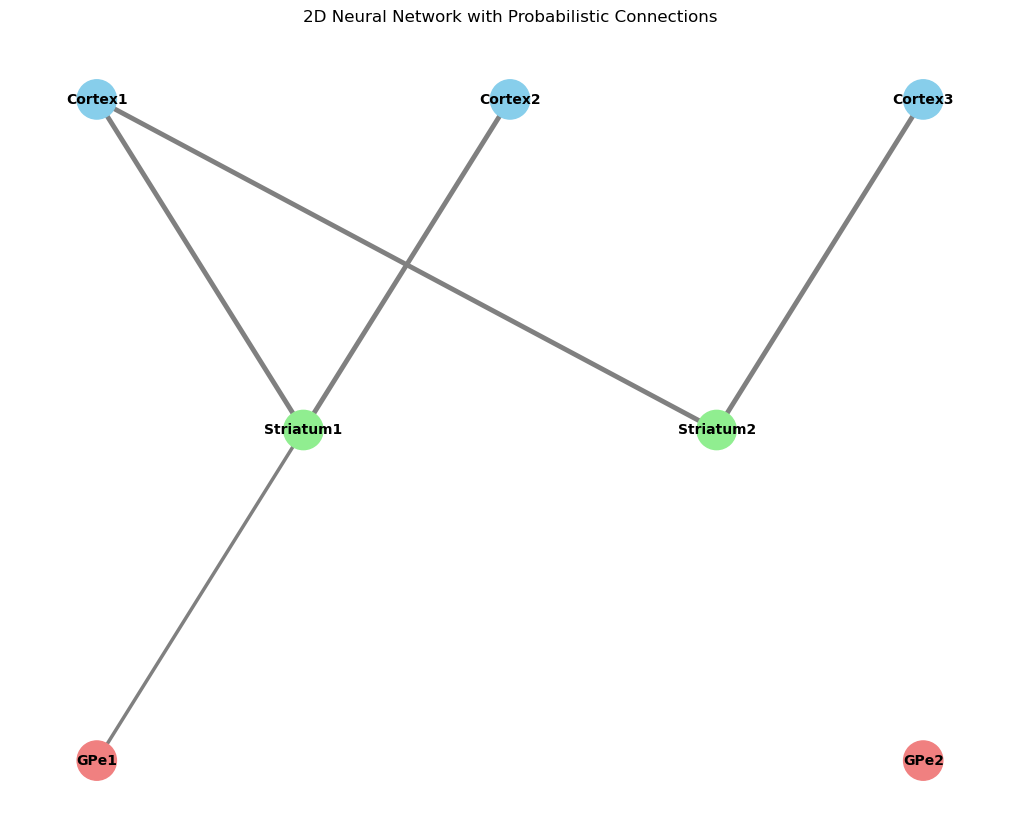

In [11]:
import matplotlib.pyplot as plt
import networkx as nx
import random

# 그래프 객체 생성
G = nx.Graph()

# 뉴런 그룹과 뉴런 수 설정
neuron_groups = {
    'Cortex': [(1, 4), (2, 4), (3, 4)],  # 3개의 Cortex 뉴런
    'Striatum': [(1.5, 2), (2.5, 2)],    # 2개의 Striatum 뉴런
    'GPe': [(1, 0), (3, 0)]              # 2개의 GPe 뉴런
}

# 노드 추가
positions = {}
for group, coords in neuron_groups.items():
    for i, pos in enumerate(coords):
        node_name = f"{group}{i+1}"
        G.add_node(node_name, group=group)
        positions[node_name] = pos

# 연결 확률 설정
connection_probs = {
    ('Cortex', 'Striatum'): 0.7,  # 70% 확률로 연결
    ('Striatum', 'GPe'): 0.5,     # 50% 확률로 연결
}

# 확률에 따라 연결 생성
for (group1, group2), prob in connection_probs.items():
    nodes1 = [node for node in G.nodes if node.startswith(group1)]
    nodes2 = [node for node in G.nodes if node.startswith(group2)]
    
    for node1 in nodes1:
        for node2 in nodes2:
            if random.random() < prob:  # 연결 확률 적용
                G.add_edge(node1, node2, weight=prob)

# 노드 색상 설정
color_map = {'Cortex': 'skyblue', 'Striatum': 'lightgreen', 'GPe': 'lightcoral'}
node_colors = [color_map[G.nodes[node]['group']] for node in G.nodes()]

# 연결선 굵기 설정 (확률에 비례)
edge_widths = [G[u][v]['weight'] * 5 for u, v in G.edges()]

# 그래프 시각화
plt.figure(figsize=(10, 8))
nx.draw(G, pos=positions, with_labels=True, node_color=node_colors,
        node_size=800, font_size=10, font_weight='bold',
        edge_color='gray', width=edge_widths)
plt.title("2D Neural Network with Probabilistic Connections")
plt.show()


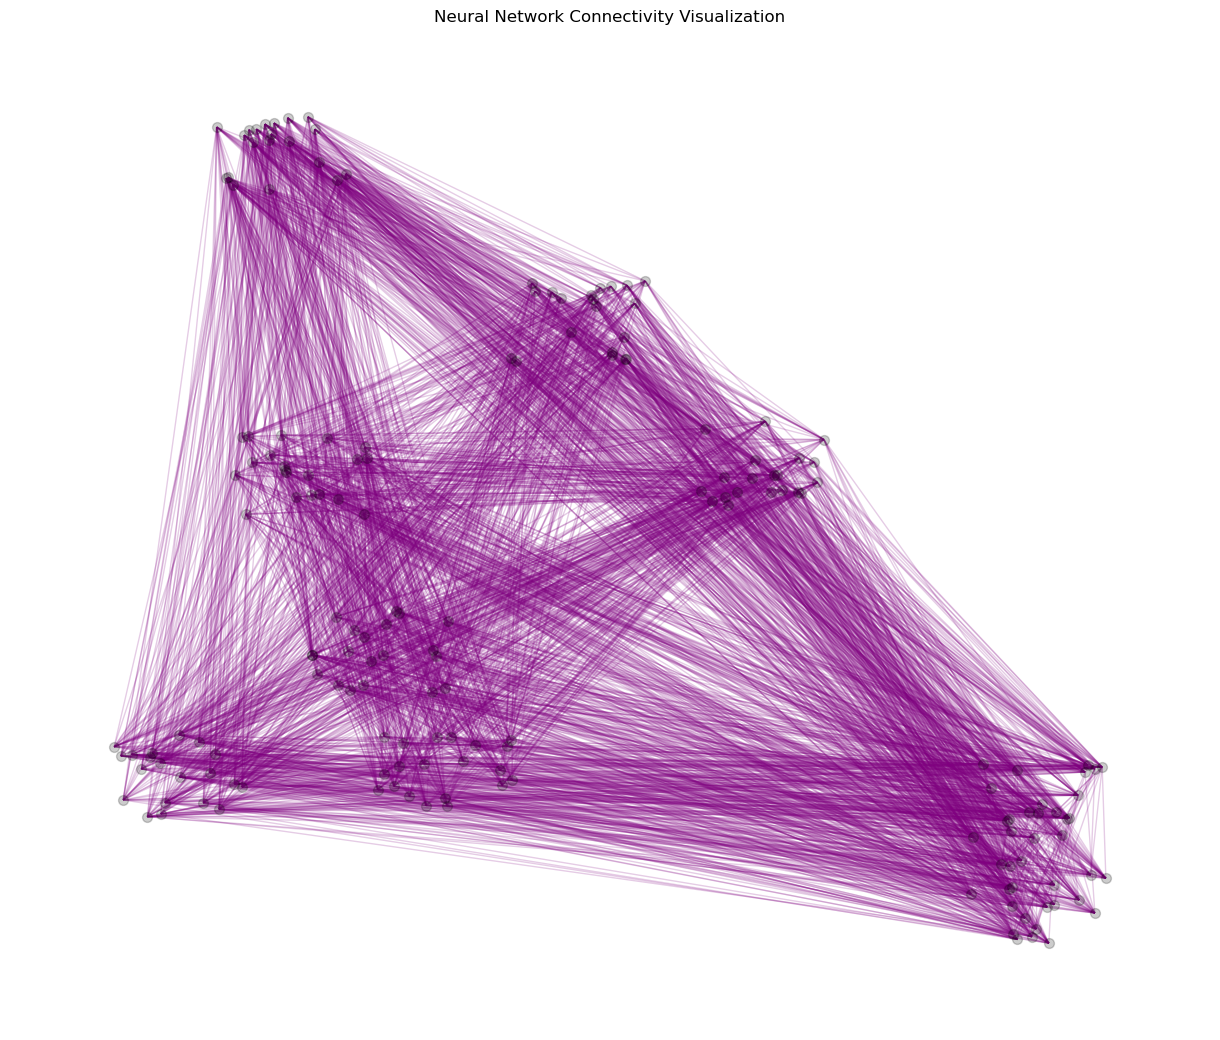

In [12]:
import matplotlib.pyplot as plt
import networkx as nx
import random

# 그래프 객체 생성
G = nx.Graph()

# 그룹 및 노드 수 설정 (EL 그룹 9개)
groups = {f"EL {i}": (random.uniform(0, 10), random.uniform(0, 10)) for i in range(9)}

# 각 그룹에 뉴런 노드 추가
positions = {}
node_size_per_group = 20  # 그룹당 노드 수
for group, (x, y) in groups.items():
    for i in range(node_size_per_group):
        node_name = f"{group}_{i}"
        G.add_node(node_name, group=group)
        positions[node_name] = (x + random.uniform(-0.5, 0.5), y + random.uniform(-0.5, 0.5))

# 그룹 간 랜덤 연결
for group1 in groups:
    for group2 in groups:
        if group1 != group2:
            nodes1 = [n for n in G.nodes if n.startswith(group1)]
            nodes2 = [n for n in G.nodes if n.startswith(group2)]
            for node1 in nodes1:
                for node2 in nodes2:
                    if random.random() < 0.1:  # 10% 확률로 연결
                        G.add_edge(node1, node2, weight=random.random())

# 그래프 그리기
plt.figure(figsize=(12, 10))
nx.draw(G, pos=positions, with_labels=False,
        node_size=50, node_color='black',
        edge_color='purple', alpha=0.2)
plt.title("Neural Network Connectivity Visualization")
plt.show()


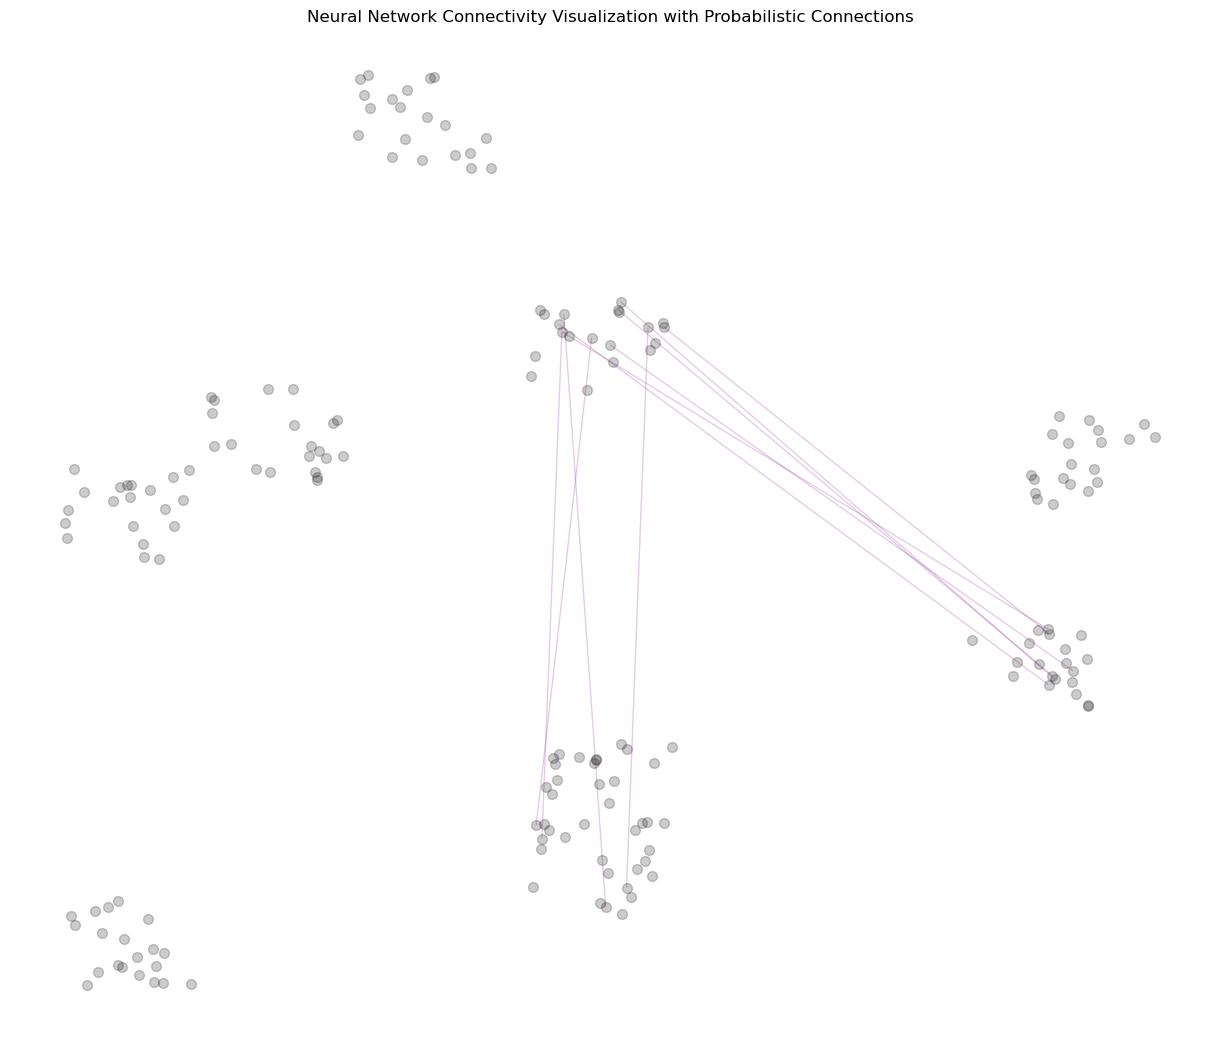

In [14]:
import matplotlib.pyplot as plt
import networkx as nx
import random

# 그래프 객체 생성
G = nx.Graph()

# 그룹 및 노드 수 설정 (예시로 9개의 그룹)
groups = {f"EL {i}": (random.uniform(0, 10), random.uniform(0, 10)) for i in range(9)}

# 각 그룹에 뉴런 노드 추가
positions = {}
node_size_per_group = 20  # 그룹당 노드 수
for group, (x, y) in groups.items():
    for i in range(node_size_per_group):
        node_name = f"{group}_{i}"
        G.add_node(node_name, group=group)
        positions[node_name] = (x + random.uniform(-0.5, 0.5), y + random.uniform(-0.5, 0.5))

# 그룹 간 연결 확률 설정 (예시: 10% 확률로 연결)
connection_probabilities = {
    ('EL 0', 'EL 1'): 0.3,  # EL 0과 EL 1은 30% 확률로 연결
    ('EL 1', 'EL 2'): 0.2,  # EL 1과 EL 2는 20% 확률로 연결
    # 다른 그룹들 간의 연결 확률 추가 가능
}

# 그룹 간 랜덤 연결 (확률에 따른 연결)
for (group1, group2), prob in connection_probabilities.items():
    nodes1 = [n for n in G.nodes if n.startswith(group1)]
    nodes2 = [n for n in G.nodes if n.startswith(group2)]
    
    # 연결할 뉴런 수 계산
    num_connections = int(len(nodes1) * prob)  # 연결될 뉴런 수 (확률에 비례)
    
    # 랜덤으로 연결할 뉴런 선택
    selected_nodes1 = random.sample(nodes1, num_connections)
    selected_nodes2 = random.sample(nodes2, num_connections)
    
    # 선택된 뉴런들 간에 연결 추가
    for node1, node2 in zip(selected_nodes1, selected_nodes2):
        G.add_edge(node1, node2, weight=random.random())

# 그래프 그리기
plt.figure(figsize=(12, 10))
nx.draw(G, pos=positions, with_labels=False,
        node_size=50, node_color='black',
        edge_color='purple', alpha=0.2)
plt.title("Neural Network Connectivity Visualization with Probabilistic Connections")
plt.show()

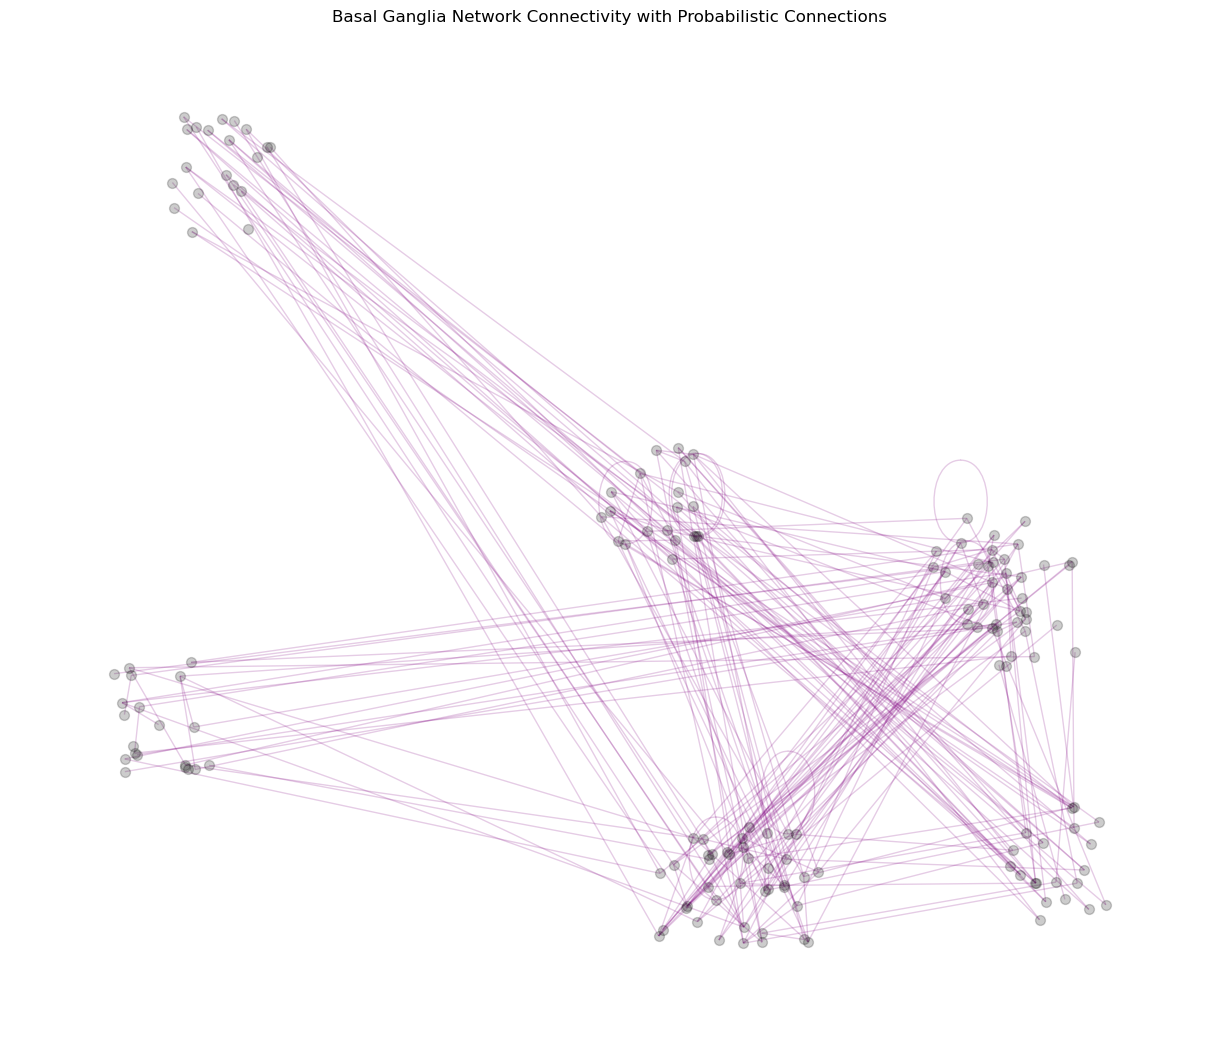

In [17]:
import matplotlib.pyplot as plt
import networkx as nx
import random

# 그래프 객체 생성
G = nx.Graph()

# 그룹 및 노드 수 설정 (Basal Ganglia 관련 뉴런 그룹 설정)
groups = {
    "FSN": (random.uniform(0, 10), random.uniform(0, 10)),
    "MSND1": (random.uniform(0, 10), random.uniform(0, 10)),
    "MSND2": (random.uniform(0, 10), random.uniform(0, 10)),
    "GPeT1": (random.uniform(0, 10), random.uniform(0, 10)),
    "GPeTA": (random.uniform(0, 10), random.uniform(0, 10)),
    "STN": (random.uniform(0, 10), random.uniform(0, 10)),
    "SNr": (random.uniform(0, 10), random.uniform(0, 10)),
    "CTX": (random.uniform(0, 10), random.uniform(0, 10)),
}

# 각 그룹에 뉴런 노드 추가
positions = {}
node_size_per_group = 20  # 그룹당 노드 수
for group, (x, y) in groups.items():
    for i in range(node_size_per_group):
        node_name = f"{group}_{i}"
        G.add_node(node_name, group=group)
        positions[node_name] = (x + random.uniform(-0.5, 0.5), y + random.uniform(-0.5, 0.5))

# 그룹 간 연결 확률 설정 (도파민 부족 및 억제를 반영한 예시)
connection_probabilities = {
    ('CTX', 'FSN'): 0.5,
    ('CTX', 'MSND1'): 0.5,
    ('CTX', 'MSND2'): 0.5,
    ('CTX', 'STN'): 0.5,
    ('FSN', 'MSND1'): 0.3,  
    ('FSN', 'MSND2'): 0.3, 
    ('FSN', 'FSN'): 0.3,  
    ('MSND1', 'MSND1'): 0.5,  
    ('MSND1', 'MSND2'): 0.5, 
    ('MSND1', 'SNr'): 0.5, 
    ('MSND2', 'MSND1'): 0.5, 
    ('MSND2', 'MSND2'): 0.5, 
    ('MSND2', 'GPeT1'): 0.5, 
    ('GPeT1', 'GPeT1'): 0.5, 
    ('GPeT1', 'GPeTA'): 0.5,
    ('GPeT1', 'SNr'): 0.5,
    ('GPeT1', 'STN'): 0.5,
    ('GPeTA', 'GPeTA'): 0.5,
    ('GPeTA', 'GPeT1'): 0.5,
    ('GPeTA', 'MSND1'): 0.5,
    ('GPeTA', 'MSND2'): 0.5, 
    ('STN', 'GPeT1'): 0.5, 
    ('STN', 'GPeTA'): 0.5, 
    ('STN', 'SNr'): 0.5, 
}

# 그룹 간 랜덤 연결 (확률에 따른 연결)
for (group1, group2), prob in connection_probabilities.items():
    nodes1 = [n for n in G.nodes if n.startswith(group1)]
    nodes2 = [n for n in G.nodes if n.startswith(group2)]
    
    # 연결할 뉴런 수 계산
    num_connections = int(len(nodes1) * prob)  # 연결될 뉴런 수 (확률에 비례)
    
    # 랜덤으로 연결할 뉴런 선택
    selected_nodes1 = random.sample(nodes1, num_connections)
    selected_nodes2 = random.sample(nodes2, num_connections)
    
    # 선택된 뉴런들 간에 연결 추가
    for node1, node2 in zip(selected_nodes1, selected_nodes2):
        G.add_edge(node1, node2, weight=random.random())

# 그래프 그리기
plt.figure(figsize=(12, 10))
nx.draw(G, pos=positions, with_labels=False,
        node_size=50, node_color='black',
        edge_color='purple', alpha=0.2)
plt.title("Basal Ganglia Network Connectivity with Probabilistic Connections")
plt.show()


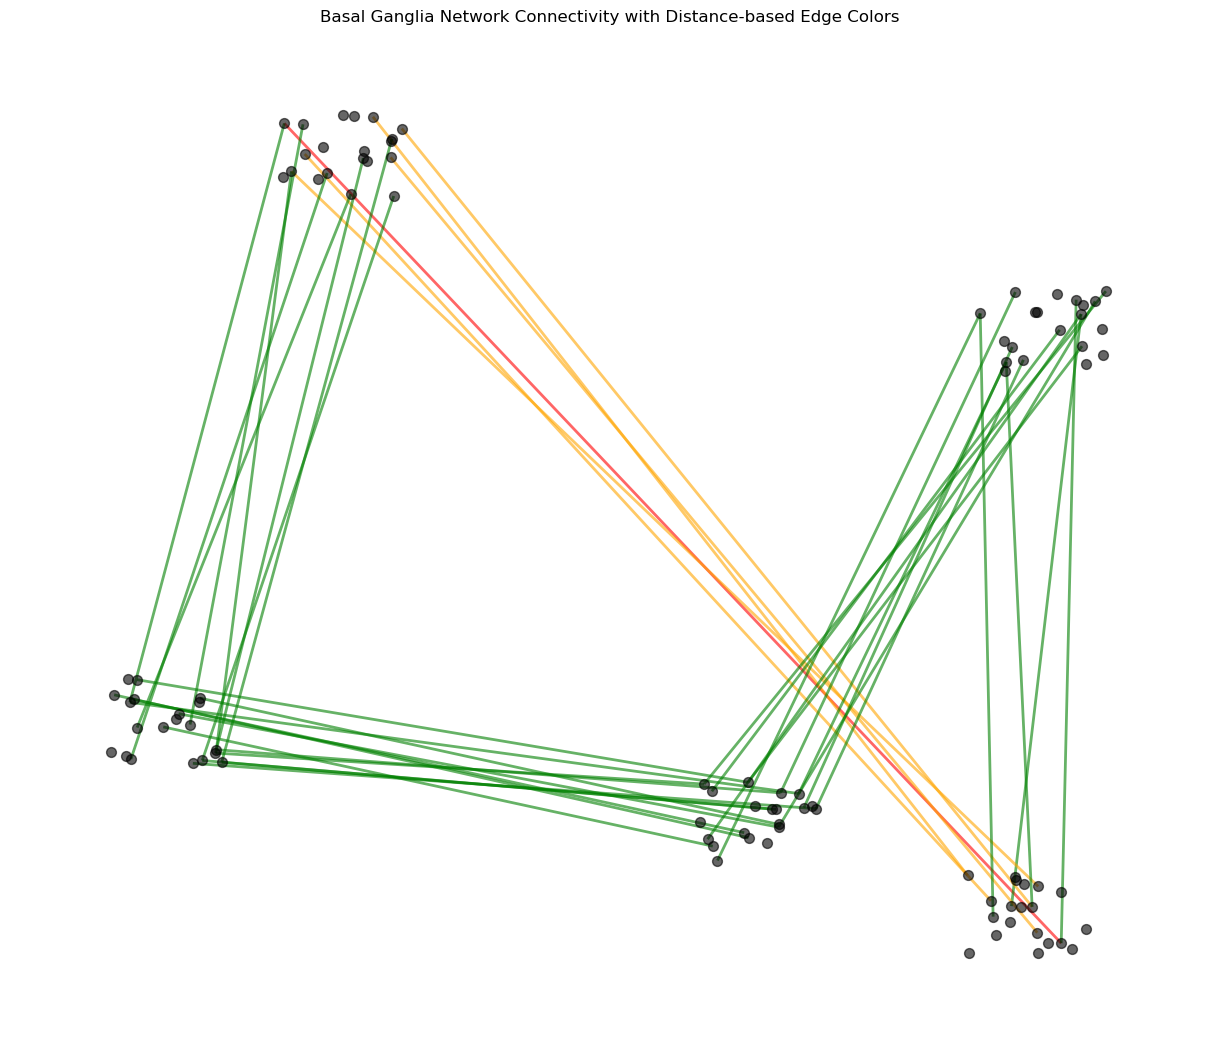

In [18]:
import matplotlib.pyplot as plt
import networkx as nx
import random
import numpy as np

# 그래프 객체 생성
G = nx.Graph()

# 그룹 및 노드 수 설정 (Basal Ganglia 관련 뉴런 그룹 설정)
groups = {
    "STN": (random.uniform(0, 10), random.uniform(0, 10)),
    "GPe": (random.uniform(0, 10), random.uniform(0, 10)),
    "Striatum": (random.uniform(0, 10), random.uniform(0, 10)),
    "GPi": (random.uniform(0, 10), random.uniform(0, 10)),
    "Cortex": (random.uniform(0, 10), random.uniform(0, 10)),
}

# 각 그룹에 뉴런 노드 추가
positions = {}
node_size_per_group = 20  # 그룹당 노드 수
for group, (x, y) in groups.items():
    for i in range(node_size_per_group):
        node_name = f"{group}_{i}"
        G.add_node(node_name, group=group)
        positions[node_name] = (x + random.uniform(-0.5, 0.5), y + random.uniform(-0.5, 0.5))

# 그룹 간 연결 확률 설정 (도파민 부족 및 억제를 반영한 예시)
connection_probabilities = {
    ('STN', 'GPe'): 0.3,  # STN과 GPe는 30% 확률로 연결
    ('Cortex', 'Striatum'): 0.5,  # Cortex와 Striatum은 50% 확률로 연결
    ('Striatum', 'GPi'): 0.6,  # Striatum과 GPi는 60% 확률로 연결
    ('GPe', 'GPi'): 0.4,  # GPe와 GPi는 40% 확률로 연결
    ('Cortex', 'STN'): 0.2,  # Cortex와 STN은 20% 확률로 연결
}

# 그룹 간 랜덤 연결 (확률에 따른 연결)
for (group1, group2), prob in connection_probabilities.items():
    nodes1 = [n for n in G.nodes if n.startswith(group1)]
    nodes2 = [n for n in G.nodes if n.startswith(group2)]
    
    # 연결할 뉴런 수 계산
    num_connections = int(len(nodes1) * prob)  # 연결될 뉴런 수 (확률에 비례)
    
    # 랜덤으로 연결할 뉴런 선택
    selected_nodes1 = random.sample(nodes1, num_connections)
    selected_nodes2 = random.sample(nodes2, num_connections)
    
    # 선택된 뉴런들 간에 연결 추가
    for node1, node2 in zip(selected_nodes1, selected_nodes2):
        G.add_edge(node1, node2, weight=random.random())

# 각 간선의 거리를 계산하고, 거리 값을 기준으로 색상을 정하기
edges = G.edges()
edge_colors = []
distances = []

# 두 노드 간의 유클리드 거리 계산 함수
def calculate_distance(node1, node2):
    x1, y1 = positions[node1]
    x2, y2 = positions[node2]
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

# 각 간선의 거리를 계산하여 색상 분포
for edge in edges:
    distance = calculate_distance(edge[0], edge[1])
    distances.append(distance)

# 거리 값의 최소, 최대, 중간 값 구하기
min_distance = min(distances)
max_distance = max(distances)
mid_distance = (max_distance - min_distance) / 2 + min_distance

# 거리를 3등분하여 색상 설정
for distance in distances:
    if distance < mid_distance:
        edge_colors.append('green')  # 가까운 거리
    elif distance > mid_distance and distance < max_distance:
        edge_colors.append('orange')  # 중간 거리
    else:
        edge_colors.append('red')  # 먼 거리

# 그래프 그리기
plt.figure(figsize=(12, 10))
nx.draw(G, pos=positions, with_labels=False,
        node_size=50, node_color='black',
        edge_color=edge_colors, alpha=0.6, width=2)
plt.title("Basal Ganglia Network Connectivity with Distance-based Edge Colors")
plt.show()


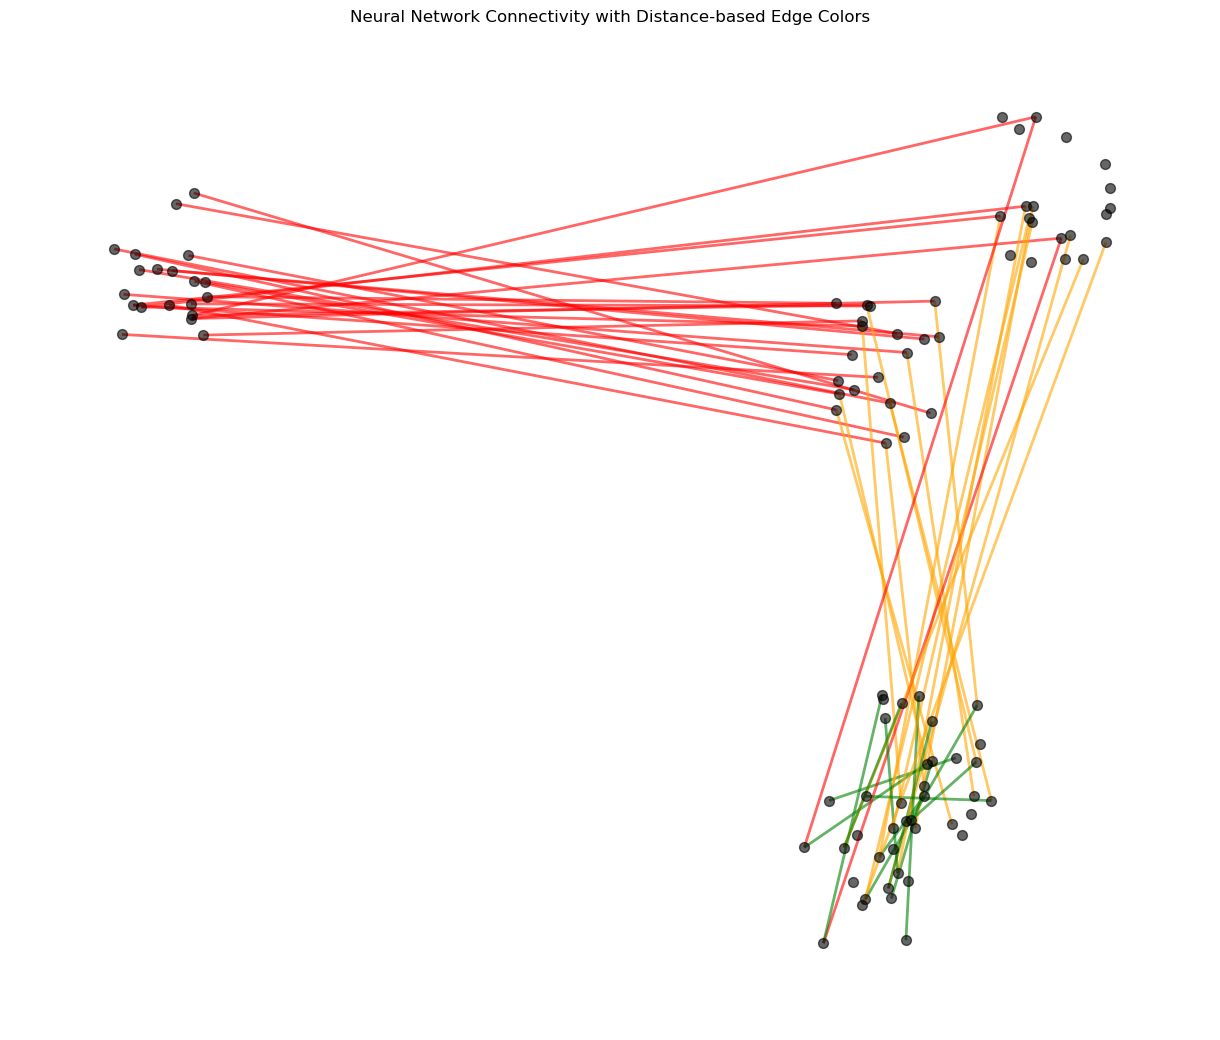

: 

In [19]:
import matplotlib.pyplot as plt
import networkx as nx
import random
import numpy as np

# 그래프 객체 생성
G = nx.Graph()

# 그룹 및 노드 수 설정
groups = {
    "STN": (random.uniform(0, 10), random.uniform(0, 10)),
    "GPe": (random.uniform(0, 10), random.uniform(0, 10)),
    "Striatum": (random.uniform(0, 10), random.uniform(0, 10)),
    "GPi": (random.uniform(0, 10), random.uniform(0, 10)),
    "Cortex": (random.uniform(0, 10), random.uniform(0, 10)),
}

# 각 그룹에 뉴런 노드 추가
positions = {}
node_size_per_group = 20  # 그룹당 노드 수
for group, (x, y) in groups.items():
    for i in range(node_size_per_group):
        node_name = f"{group}_{i}"
        G.add_node(node_name, group=group)
        positions[node_name] = (x + random.uniform(-0.5, 0.5), y + random.uniform(-0.5, 0.5))

# 그룹 간 연결 확률 설정 (예시)
connection_probabilities = {
    ('STN', 'GPe'): 1.0,  # STN과 GPe는 100% 연결
    ('Cortex', 'Striatum'): 0.5,  # Cortex와 Striatum은 50% 연결
    ('Striatum', 'GPi'): 0.6,  # Striatum과 GPi는 60% 연결
    ('GPe', 'GPi'): 0.4,  # GPe와 GPi는 40% 연결
    ('Cortex', 'STN'): 0.2,  # Cortex와 STN은 20% 연결
}

# 그룹 간 랜덤 연결 (확률에 따른 연결)
for (group1, group2), prob in connection_probabilities.items():
    nodes1 = [n for n in G.nodes if n.startswith(group1)]
    nodes2 = [n for n in G.nodes if n.startswith(group2)]
    
    # 연결할 뉴런 수 계산
    num_connections = int(len(nodes1) * prob)  # 연결될 뉴런 수 (확률에 비례)
    
    # 랜덤으로 연결할 뉴런 선택
    selected_nodes1 = random.sample(nodes1, num_connections)
    selected_nodes2 = random.sample(nodes2, num_connections)
    
    # 선택된 뉴런들 간에 연결 추가
    for node1, node2 in zip(selected_nodes1, selected_nodes2):
        G.add_edge(node1, node2, weight=random.random())

# 각 간선의 거리를 계산하고, 거리 값을 기준으로 색상 분포
edges = G.edges()
edge_colors = []

# 두 노드 간의 유클리드 거리 계산 함수
def calculate_distance(node1, node2):
    x1, y1 = positions[node1]
    x2, y2 = positions[node2]
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

# 거리 기준으로 색상 설정
for edge in edges:
    distance = calculate_distance(edge[0], edge[1])
    if distance < 2:
        edge_colors.append('green')  # 가까운 거리
    elif distance < 5:
        edge_colors.append('orange')  # 중간 거리
    else:
        edge_colors.append('red')  # 먼 거리

# 연결된 뉴런들의 거리별 색상 출력
plt.figure(figsize=(12, 10))

# 각 연결에 대해 색상 표시
nx.draw(G, pos=positions, with_labels=False,
        node_size=50, node_color='black',
        edge_color=edge_colors, alpha=0.6, width=2)

plt.title("Neural Network Connectivity with Distance-based Edge Colors")
plt.show()


/var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/ipykernel_11539/1988113705.py:108: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


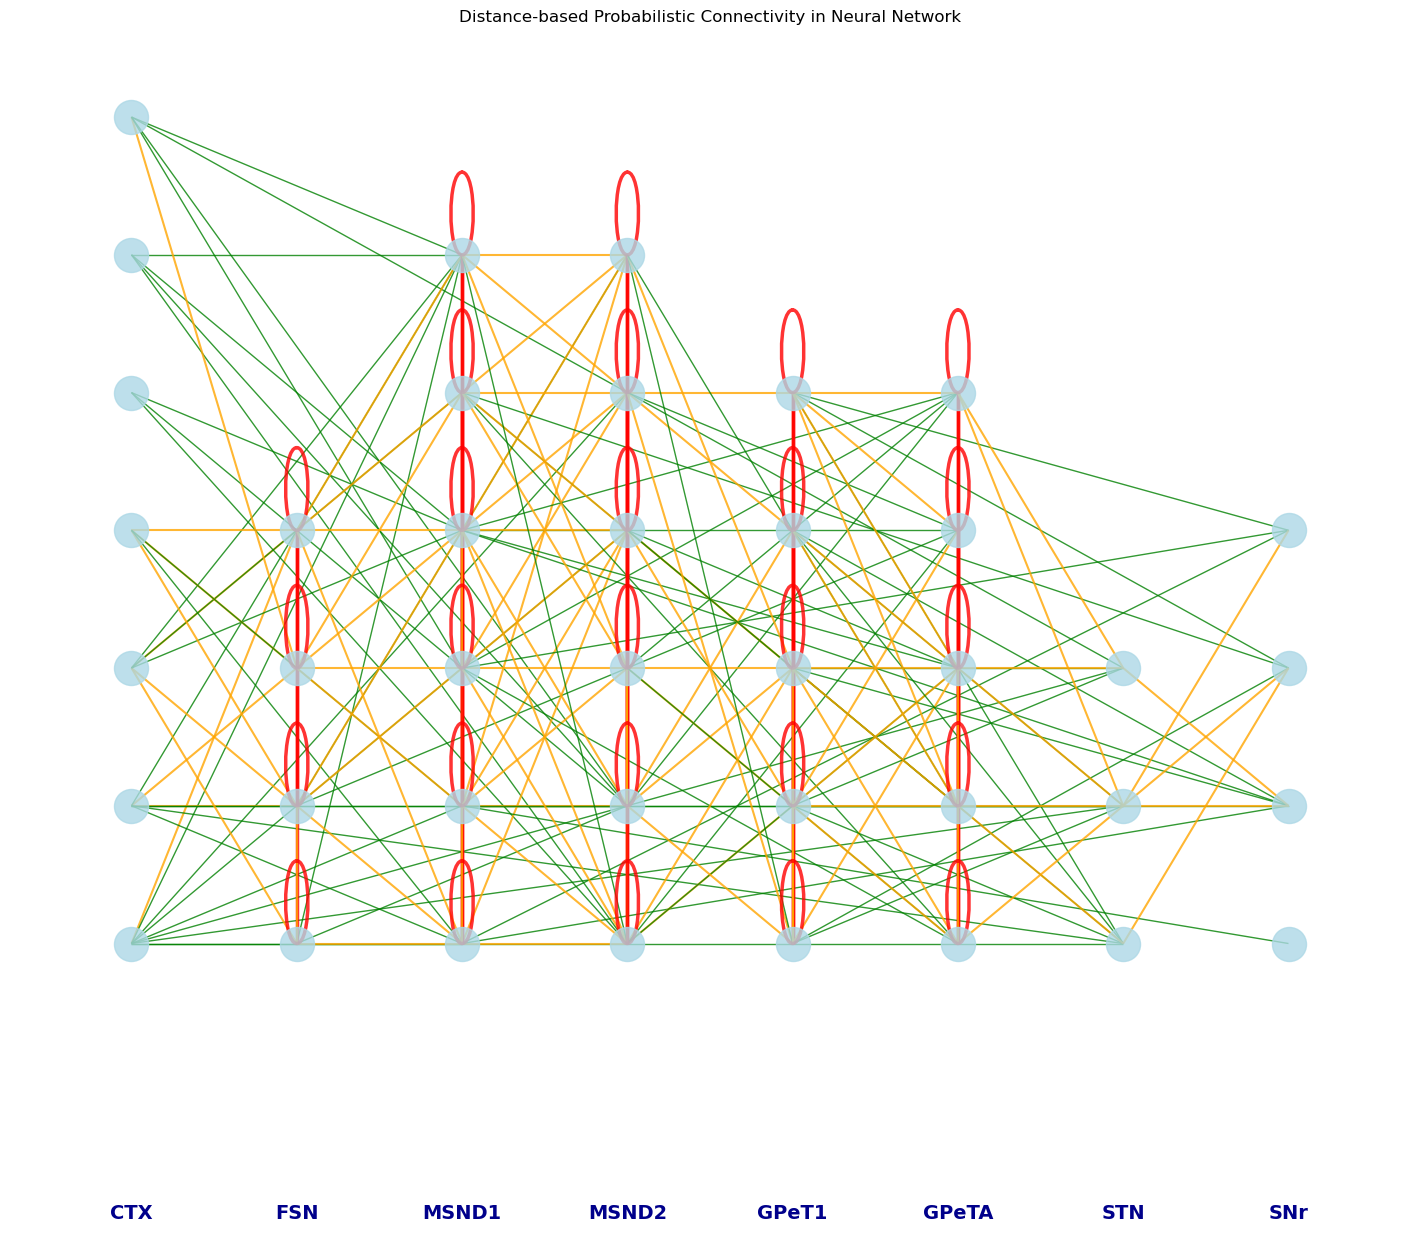

In [12]:
import matplotlib.pyplot as plt
import networkx as nx
import random
import numpy as np

# 그래프 객체 생성
G = nx.Graph()

# 뉴런 그룹별 설정
layers = {
    "CTX": 7,
    "FSN": 4,
    "MSND1": 6,
    "MSND2": 6,
    "GPeT1": 5,
    "GPeTA": 5,
    "STN": 3,
    "SNr": 4
}

# 뉴런 그룹 간의 특정 연결 관계 정의
connections = {
    ('CTX', 'FSN'),
    ('CTX', 'MSND1'),
    ('CTX', 'MSND2'),
    ('CTX', 'STN'),
    ('FSN', 'MSND1'),  
    ('FSN', 'MSND2'), 
    ('FSN', 'FSN'),  
    ('MSND1', 'MSND1'),  
    ('MSND1', 'MSND2'), 
    ('MSND1', 'SNr'), 
    ('MSND2', 'MSND1'), 
    ('MSND2', 'MSND2'), 
    ('MSND2', 'GPeT1'), 
    ('GPeT1', 'GPeT1'), 
    ('GPeT1', 'GPeTA'),
    ('GPeT1', 'SNr'),
    ('GPeT1', 'STN'),
    ('GPeTA', 'GPeTA'),
    ('GPeTA', 'GPeT1'),
    ('GPeTA', 'MSND1'),
    ('GPeTA', 'MSND2'), 
    ('STN', 'GPeT1'), 
    ('STN', 'GPeTA'), 
    ('STN', 'SNr') 
}

# 노드 위치 설정
positions = {}
layer_gap = 5
neuron_gap = 1.5

# 노드 추가 및 위치 배치
layer_index = 0
for group, num_neurons in layers.items():
    for neuron_idx in range(num_neurons):
        node_name = f"{group}_{neuron_idx}"
        G.add_node(node_name)
        x_pos = layer_index * layer_gap
        y_pos = neuron_idx * neuron_gap
        positions[node_name] = (x_pos, y_pos)
    layer_index += 1

# 거리 기반 연결 및 색상 설정
def calculate_distance(pos1, pos2):
    return np.sqrt((pos2[0] - pos1[0]) ** 2 + (pos2[1] - pos1[1]) ** 2)

def get_edge_color_and_width(distance):
    if distance < 4:
        return 'red', 2.5  # 짧고 확률이 큰 경우
    elif distance < 8:
        return 'orange', 1.5  # 중간 거리
    else:
        return 'green', 1.0  # 먼 거리

# 노드 간 연결 추가 및 거리 계산
for conn in connections:
    group1_nodes = [n for n in G.nodes if n.startswith(conn[0])]
    group2_nodes = [n for n in G.nodes if n.startswith(conn[1])]
    for node1 in group1_nodes:
        for node2 in group2_nodes:
            distance = calculate_distance(positions[node1], positions[node2])
            connection_probability = max(0.3, 1 - distance / 10)  # 최소 확률 보장
            if random.random() < connection_probability:  # 확률에 따른 연결
                color, width = get_edge_color_and_width(distance)
                G.add_edge(node1, node2, color=color, width=width)  # 엣지에 색상 및 굵기 정보 추가

# 그래프 시각화
plt.figure(figsize=(14, 10))

# 엣지 색상 및 굵기 적용
edges = G.edges()
edge_colors = [G[u][v]['color'] for u, v in edges]
edge_widths = [G[u][v]['width'] for u, v in edges]

nx.draw(G, pos=positions, with_labels=False,
        node_size=600, node_color='lightblue',
        edge_color=edge_colors, width=edge_widths, alpha=0.8)

# 각 레이어 이름 추가
for idx, (group, num_neurons) in enumerate(layers.items()):
    x = idx * layer_gap
    plt.text(x, -3, group, fontsize=14, ha='center', fontweight='bold', color='darkblue')

plt.title("Distance-based Probabilistic Connectivity in Neural Network")
plt.axis('off')
plt.tight_layout()
plt.show()

In [1]:
import plotly.graph_objects as go

# 뉴런 그룹 (열)
labels = ["CTX", "FSN", "MSN D1", "MSN D2", "GPe", "STN", "SNr"]

# 연결 관계 (출발지와 목적지의 인덱스, 연결 강도)
# 출발지: source, 목적지: target, 연결 강도: value
source = [0, 1, 1, 2, 2, 3, 4, 5]  # 출발 뉴런 그룹 인덱스
target = [1, 2, 3, 3, 4, 5, 5, 6]  # 연결된 뉴런 그룹 인덱스
value =  [8, 10, 6, 4, 7, 5, 3, 6]  # 연결 강도 (가중치)

# Sankey Diagram 생성
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,  # 뉴런 그룹 라벨
        color="blue"   # 노드 색상
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color="rgba(31, 119, 180, 0.5)"  # 링크 색상 및 투명도
    )
))

fig.update_layout(title_text="Neural Network Connectivity", font_size=12)
fig.show()


In [4]:
import plotly.graph_objects as go

labels = ["CTX", "FSN"]

source = [0, 1] 
target = [1, 2]  
value =  [8, 16]  

# Sankey Diagram 생성
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,  # 뉴런 그룹 라벨
        color="blue"   # 노드 색상
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color="rgba(31, 119, 180, 0.5)"  # 링크 색상 및 투명도
    )
))

fig.update_layout(title_text="Neural Network Connectivity", font_size=12)
fig.show()


In [29]:
import plotly.graph_objects as go

labels = ["CTX1-1", "CTX1-2", "CTX1-3", 
          "CTX2-1", "CTX2-2", "CTX2-3", 
          "CTX3-1", "CTX3-2", "CTX3-3", 
          "FSN1", "FSN2", "FSN3"]

# set node parameter 
source = [0, 3, 6,   # CTX1 → FSN
          1, 4, 7,   # CTX2 → FSN
          2, 5, 8]   # CTX3 → FSN

target = [9, 10, 11,  # FSN1, FSN2, FSN3
          9, 10, 11,  
          9, 10, 11]

# 각 연결의 가중치 설정 (FSN1에 대한 연결 확률이 가장 큼)
value =  [8, 5, 3,   # CTX1 → FSN 연결 가중치
          7, 4, 2,   # CTX2 → FSN 연결 가중치
          6, 3, 2]   # CTX3 → FSN 연결 가중치

# Sankey Diagram 생성
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color=["blue"]*9 + ["red"]*3  # CTX 그룹은 파란색, FSN은 빨간색
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=["rgba(31, 119, 180, 0.7)", "rgba(31, 119, 180, 0.5)", "rgba(31, 119, 180, 0.3)",
               "rgba(255, 0, 0, 0.7)", "rgba(255, 0, 0, 0.5)", "rgba(255, 0, 0, 0.3)"] * 2  # 가중치별 투명도 조정
    )
))

fig.show()


In [2]:
import plotly.graph_objects as go

labels = ["CTX1", "CTX2", "CTX3", "FSN1", "FSN2", "FSN3"]

# CTX 그룹 → FSN 연결
source = [
    0, 0, 0,   # CTX1 → FSN1, FSN2, FSN3
    1, 1, 1,   # CTX2 → FSN2, FSN1, FSN3
    2, 2, 2    # CTX3 → FSN3, FSN1, FSN2
]

target = [
    3, 4, 5,   # CTX1 → FSN1, FSN2, FSN3
    4, 3, 5,   # CTX2 → FSN2, FSN1, FSN3
    5, 3, 4    # CTX3 → FSN3, FSN1, FSN2
]

value = [
    8, 5, 3,   # CTX1: FSN1 (높은), FSN2 (중간), FSN3 (낮음)
    8, 5, 3,   # CTX2: FSN2 (높은), FSN1 (중간), FSN3 (낮음)
    8, 5, 3    # CTX3: FSN3 (높은), FSN1 (중간), FSN2 (낮음)
]

fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=30,
        line=dict(color="black", width=0.5),
        label=labels,
        color=["blue", "blue", "blue", "red", "red", "red"],  # CTX 그룹과 FSN 그룹
        x=[0.1, 0.1, 0.1, 0.9, 0.9, 0.9],  # CTX는 왼쪽, FSN은 오른쪽
        y=[0.1, 0.5, 0.9, 0.1, 0.5, 0.9],  # CTX1, 2, 3 각각 수직 위치 다르게
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=["rgba(31, 119, 180, 0.8)", "rgba(31, 119, 180, 0.5)", "rgba(31, 119, 180, 0.3)",
               "rgba(255, 0, 0, 0.8)", "rgba(255, 0, 0, 0.5)", "rgba(255, 0, 0, 0.3)",
               "rgba(50, 205, 50, 0.8)", "rgba(50, 205, 50, 0.5)", "rgba(50, 205, 50, 0.3)"]
    )
))

fig.show()

In [8]:
import plotly.graph_objects as go

labels = ["CTX1", "CTX2", "CTX3", "FSN1", "FSN2", "FSN3"]

# CTX 그룹 → FSN 연결
source = [
    0, 0, 0,   # CTX1 → FSN1, FSN2, FSN3
    1, 1, 1,   # CTX2 → FSN1, FSN2, FSN3
    2, 2, 2    # CTX3 → FSN1, FSN2, FSN3
]

target = [
    3, 4, 5,   # CTX1 → FSN1, FSN2, FSN3
    3, 4, 5,   # CTX2 → FSN1, FSN2, FSN3
    5, 3, 4    # CTX3 → FSN1, FSN2, FSN3
]

value = [
    8, 5, 3,   # CTX1: FSN1 (높은), FSN2 (중간), FSN3 (낮음)
    8, 5, 3,   # CTX2: FSN1 (높은), FSN2 (중간), FSN3 (낮음)
    8, 5, 3    # CTX3: FSN1 (높은), FSN2 (중간), FSN3 (낮음)
]

# 색상 그라데이션 설정
colors = [
    "rgba(31, 119, 180, 0.8)",  # CTX1 → FSN1
    "rgba(31, 119, 180, 0.5)",  # CTX1 → FSN2
    "rgba(31, 119, 180, 0.3)",  # CTX1 → FSN3
    "rgba(255, 0, 0, 0.8)",     # CTX2 → FSN1
    "rgba(255, 0, 0, 0.5)",     # CTX2 → FSN2
    "rgba(255, 0, 0, 0.3)",     # CTX2 → FSN3
    "rgba(50, 205, 50, 0.8)",    # CTX3 → FSN1
    "rgba(50, 205, 50, 0.5)",    # CTX3 → FSN2
    "rgba(50, 205, 50, 0.3)"     # CTX3 → FSN3
]

fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=30,
        line=dict(color="black", width=0.5),
        label=labels,
        color=["blue", "blue", "blue", "red", "red", "red"],  # CTX 그룹과 FSN 그룹
        x=[0.1, 0.1, 0.1, 0.9, 0.9, 0.9],  # CTX는 왼쪽, FSN은 오른쪽
        y=[0.1, 0.5, 0.9, 0.1, 0.5, 0.9],  # CTX1, 2, 3 각각 수직 위치 다르게
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=colors  # 그라데이션 색상 적용
    )
))

fig.show()

In [16]:
import plotly.graph_objects as go

labels = ["CTX1", "CTX2", "CTX3", "FSN1", "FSN2", "FSN3"]

# CTX 그룹 → FSN 연결
source = [
    0, 0, 0,   # CTX1 → FSN1, FSN2, FSN3
    1, 1, 1,   # CTX2 → FSN1, FSN2, FSN3
    2, 2, 2    # CTX3 → FSN1, FSN2, FSN3
]

target = [
    3, 4, 5,   # CTX1 → FSN1, FSN2, FSN3
    3, 4, 5,   # CTX2 → FSN1, FSN2, FSN3
    5, 3, 4    # CTX3 → FSN1, FSN2, FSN3
]

value = [
    8, 5, 3,   # CTX1: FSN1 (높은), FSN2 (중간), FSN3 (낮음)
    8, 5, 3,   # CTX2: FSN1 (높은), FSN2 (중간), FSN3 (낮음)
    8, 5, 3    # CTX3: FSN1 (높은), FSN2 (중간), FSN3 (낮음)
]

# FSN 노드를 세분화하여 색상 처리
# FSN1은 CTX1, CTX2, CTX3에서 받는 입력의 강도에 따른 색상 그라데이션
fsn_colors = [
    "rgba(31, 119, 180, 0.8)",  # CTX1 → FSN1
    "rgba(31, 119, 180, 0.5)",  # CTX1 → FSN2
    "rgba(31, 119, 180, 0.3)",  # CTX1 → FSN3
    "rgba(255, 0, 0, 0.8)",     # CTX2 → FSN1
    "rgba(255, 0, 0, 0.5)",     # CTX2 → FSN2
    "rgba(255, 0, 0, 0.3)",     # CTX2 → FSN3
    "rgba(50, 205, 50, 0.8)",   # CTX3 → FSN1
    "rgba(50, 205, 50, 0.5)",   # CTX3 → FSN2
    "rgba(50, 205, 50, 0.3)"    # CTX3 → FSN3
]

# FSN 색상 그라데이션을 각 FSN에 맞게 세분화
fsn_color_map = {
    3: ["rgba(31, 119, 180, 0.8)", "rgba(255, 0, 0, 0.8)", "rgba(50, 205, 50, 0.8)"],  # FSN1
    4: ["rgba(31, 119, 180, 0.5)", "rgba(255, 0, 0, 0.5)", "rgba(50, 205, 50, 0.5)"],  # FSN2
    5: ["rgba(31, 119, 180, 0.3)", "rgba(255, 0, 0, 0.3)", "rgba(50, 205, 50, 0.3)"]   # FSN3
}

# FSN1, FSN2, FSN3에 각각 세분화된 색상 배정
colors = []
for s, t in zip(source, target):
    # 각 연결에 대한 색상 처리
    if t == 3:  # FSN1
        colors.append(fsn_color_map[3][source.index(s) % 3])  # CTX1 → FSN1, CTX2 → FSN1, CTX3 → FSN1
    elif t == 4:  # FSN2
        colors.append(fsn_color_map[4][source.index(s) % 3])  # CTX1 → FSN2, CTX2 → FSN2, CTX3 → FSN2
    elif t == 5:  # FSN3
        colors.append(fsn_color_map[5][source.index(s) % 3])  # CTX1 → FSN3, CTX2 → FSN3, CTX3 → FSN3

# Sankey 도표 그리기
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=30,
        line=dict(color="black", width=0.5),
        label=labels,
        color=colors,  # CTX 그룹과 FSN 그룹
        x=[0.1, 0.1, 0.1, 0.9, 0.9, 0.9],  # CTX는 왼쪽, FSN은 오른쪽
        y=[0.1, 0.5, 0.9, 0.1, 0.5, 0.9],  # CTX1, 2, 3 각각 수직 위치 다르게
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=colors  # 연결에 색상 적용
    )
))

fig.show()


In [5]:
import plotly.graph_objects as go

# 노드 라벨 (MSND1, MSND2 추가)
labels = ["CTX1", "CTX2", "CTX3", 
          "FSN1", "FSN2", "FSN3", 
          "MSND1", "MSND2"]

# CTX 그룹 → FSN 및 FSN → MSND 연결 설정
source = [0, 0, 0,   # CTX1 → FSN1, FSN2, FSN3
          1, 1, 1,   # CTX2 → FSN1, FSN2, FSN3
          2, 2, 2,   # CTX3 → FSN1, FSN2, FSN3
          3, 4, 5,   # FSN1, FSN2, FSN3 → MSND1
          3, 4, 5]   # FSN1, FSN2, FSN3 → MSND2

target = [3, 4, 5,   # FSN 노드
          3, 4, 5,   # FSN 노드
          3, 4, 5,   # FSN 노드
          6, 6, 6,   # MSND1 연결
          7, 7, 7]   # MSND2 연결

# 가중치 설정 (연결 강도)
value = [8, 5, 3,   # CTX1 → FSN
         7, 6, 4,   # CTX2 → FSN
         6, 5, 4,   # CTX3 → FSN
         5, 3, 2,   # FSN → MSND1
         4, 3, 2]   # FSN → MSND2

# 색상 설정
ctx_colors = ["rgba(31, 119, 180, 0.8)", "rgba(31, 119, 180, 0.6)", "rgba(31, 119, 180, 0.4)"]  # CTX 색상
fsn_colors = ["rgba(255, 0, 0, 0.8)", "rgba(255, 0, 0, 0.6)", "rgba(255, 0, 0, 0.4)"]  # FSN 색상
msnd_colors = ["rgba(50, 205, 50, 0.7)", "rgba(50, 205, 50, 0.5)"]  # MSND 색상

# Sankey 다이어그램 생성
fig = go.Figure(go.Sankey(
    node=dict(
        pad=10,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color=["blue"]*3 + ["red"]*3 + ["green", "green"]  # CTX, FSN, MSND 구분 색상
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=[ctx_colors[0] if s < 3 else fsn_colors[0] for s in source] +  # CTX에서 FSN으로의 연결 색상
              [fsn_colors[0]] * 3 +  # FSN에서 MSND1으로의 연결 색상
              [fsn_colors[1]] * 3  # FSN에서 MSND2으로의 연결 색상
    )
))

fig.show()

In [4]:
import plotly.graph_objects as go

# 노드 라벨 (MSND1, MSND2 추가)
labels = ["CTX1", "CTX2", "CTX3", 
          "FSN1", "FSN2", "FSN3", 
          "MSND1", "MSND2"]

# CTX 그룹 → FSN 및 FSN → MSND 연결 설정
source = [0, 0, 0,   # CTX1 → FSN1, FSN2, FSN3
          1, 1, 1,   # CTX2 → FSN1, FSN2, FSN3
          2, 2, 2,   # CTX3 → FSN1, FSN2, FSN3
          3, 4, 5,   # FSN1, FSN2, FSN3 → MSND1
          3, 4, 5]   # FSN1, FSN2, FSN3 → MSND2

target = [3, 4, 5,   # FSN 노드
          3, 4, 5,   # FSN 노드
          3, 4, 5,   # FSN 노드
          6, 6, 6,   # MSND1 연결
          7, 7, 7]   # MSND2 연결

# 가중치 설정 (연결 강도)
value = [8, 5, 3,   # CTX1 → FSN
         7, 6, 4,   # CTX2 → FSN
         6, 5, 4,   # CTX3 → FSN
         5, 3, 2,   # FSN → MSND1
         4, 3, 2]   # FSN → MSND2

# Sankey 다이어그램 생성
fig = go.Figure(go.Sankey(
    node=dict(
        pad=10,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color=["blue"]*3 + ["red"]*3 + ["green", "green"]  # CTX, FSN, MSND 구분 색상
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=["rgba(31, 119, 180, 0.8)", "rgba(31, 119, 180, 0.6)", "rgba(31, 119, 180, 0.4)",
               "rgba(255, 0, 0, 0.8)", "rgba(255, 0, 0, 0.6)", "rgba(255, 0, 0, 0.4)",
               "rgba(50, 205, 50, 0.7)", "rgba(50, 205, 50, 0.5)"] * 2  # 강도별 투명도 조정
    )
))

fig.show()

In [15]:
import plotly.graph_objects as go

labels = ["CTX1", "CTX2", "CTX3", 
          "FSN1", "FSN2", "FSN3", 
          "MSND1", "MSND2"]

source = [0, 0, 0,   
          1, 1, 1,   
          2, 2, 2,   
          3, 4, 5,   
          3, 4, 5]   

target = [3, 4, 5,   
          3, 4, 5,   
          3, 4, 5,   
          6, 6, 6,   
          7, 7, 7]   

value = [8, 5, 3,   
         4, 6, 4,   
         3, 5, 8,   
         5, 3, 2,   
         3, 3, 4]   

fig = go.Figure(go.Sankey(
    node=dict(
        pad=10,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color=["blue"]*3 + ["red"]*3 + ["green"]*2
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=["rgba(31, 119, 180, 0.6)"] * 3 +  # CTX1
              ["rgba(255, 0, 0, 0.6)"] * 3 +   # CTX2
              ["rgba(50, 205, 50, 0.6)"] * 3 + # CTX3
              ["rgba(80, 120, 0, 0.7)"] * 3 + # FSN to MSND1
              ["rgba(60, 90, 0, 0.5)"] * 3   # FSN to MSND2
    )
))

fig.show()

In [4]:
import plotly.graph_objects as go

# 노드 라벨 (MSND1, MSND2 추가)
labels = ["CTX1", "CTX2", "CTX3", 
          "FSN1", "FSN2", "FSN3", 
          "MSND1", "MSND2"]

# CTX 그룹 → FSN 및 FSN → MSND 연결 설정
source = [0, 0, 0,   # CTX1 → FSN1, FSN2, FSN3
          1, 1, 1,   # CTX2 → FSN1, FSN2, FSN3
          2, 2, 2,   # CTX3 → FSN1, FSN2, FSN3
          3, 4, 5,   # FSN1, FSN2, FSN3 → MSND1
          3, 4, 5]   # FSN1, FSN2, FSN3 → MSND2

target = [3, 4, 5,   # FSN 노드
          3, 4, 5,   # FSN 노드
          3, 4, 5,   # FSN 노드
          6, 6, 6,   # MSND1 연결
          7, 7, 7]   # MSND2 연결

# 가중치 설정 (연결 강도)
value = [8, 5, 3,   # CTX1 → FSN
         7, 6, 4,   # CTX2 → FSN
         6, 5, 4,   # CTX3 → FSN
         5, 3, 2,   # FSN → MSND1
         4, 3, 2]   # FSN → MSND2

# 색상 설정
ctx_colors = ["rgba(31, 119, 180, 0.8)", "rgba(31, 119, 180, 0.6)", "rgba(31, 119, 180, 0.4)"]  # CTX 색상
fsn_colors = ["rgba(255, 0, 0, 0.8)", "rgba(255, 0, 0, 0.6)", "rgba(255, 0, 0, 0.4)"]  # FSN 색상
msnd_colors = ["rgba(50, 205, 50, 0.7)", "rgba(50, 205, 50, 0.5)"]  # MSND 색상

# Sankey 다이어그램 생성
fig = go.Figure(go.Sankey(
    node=dict(
        pad=10,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color=["blue"]*3 + ["red"]*3 + ["green", "green"]  # CTX, FSN, MSND 구분 색상
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=[ctx_colors[0] if s < 3 else fsn_colors[0] for s in source] +  # CTX에서 FSN으로의 연결 색상
              [fsn_colors[0]] * 3 +  # FSN에서 MSND1으로의 연결 색상
              [fsn_colors[1]] * 3  # FSN에서 MSND2으로의 연결 색상
    )
))

fig.show()

In [34]:
import plotly.graph_objects as go

labels = ["CTX1-1", "CTX1-2", "CTX1-3", 
          "CTX2-1", "CTX2-2", "CTX2-3", 
          "CTX3-1", "CTX3-2", "CTX3-3", 
          "FSN1", "FSN2", "FSN3",
          "MSND1", "MSND2"]

source = [0, 3, 6,   
          1, 4, 7,   
          2, 5, 8,   
          0, 1, 2,   
          3, 4, 5,   
          6, 7, 8]

target = [9, 10, 11,  
          9, 10, 11,  
          9, 10, 11,  
          12, 12, 12,  
          13, 13, 13,  
          12, 12, 12]

value = [8, 5, 3,   
         7, 4, 2,   
         6, 3, 2,   
         4, 3, 2,   
         3, 2, 1,   
         2, 1, 1]

fig = go.Figure(go.Sankey(
    node=dict(
        pad=5,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color=["blue"]*9 + ["red"]*3 + ["green"]*2  
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=["rgba(31, 119, 180, 0.7)", "rgba(31, 119, 180, 0.5)", "rgba(31, 119, 180, 0.3)",
               "rgba(255, 0, 0, 0.7)", "rgba(255, 0, 0, 0.5)", "rgba(255, 0, 0, 0.3)",
               "rgba(50, 205, 50, 0.7)", "rgba(50, 205, 50, 0.5)", "rgba(50, 205, 50, 0.3)"] * 2
    )
))

fig.update_layout(
    font_size=12
)

fig.show()